## Please follow the below structure while attempting the hackathon, make sure to submit the jupyter file as well for every submission you are making.

## Please answer the descriptive question in the Jupyter Notebook Itself. This is going to carry more weightage in the final evaluation.

## Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [139]:
df=pd.read_csv('Train_set_TVS.csv')
df

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,435665,641706.0,Y,1048272.0,13181.84,0.0238,IT,ndf,One,4.0,...,North,43.0,7.0,Yes,Yes,0.886,0.886,2766.0,5.0,1.0
132436,509840,594160.0,N,640232.0,11911.93,0.0262,IT,ndf,One,4.0,...,North,60.0,9.0,Yes,Yes,NaN,0.641,2581.0,1.0,0.0
132437,504105,1471170.0,N,732914.0,11587.54,NaN,Non-IT,ndf,One,4.0,...,South,51.0,4.0,Yes,Yes,0.384,0.384,1987.0,3.0,0.0
132438,430757,613585.0,N,528490.2,13008.76,0.0056,Non-IT,ndf,One,4.0,...,Central,59.0,14.0,Yes,Yes,0.224,0.224,1608.0,2.0,1.0


In [88]:
df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























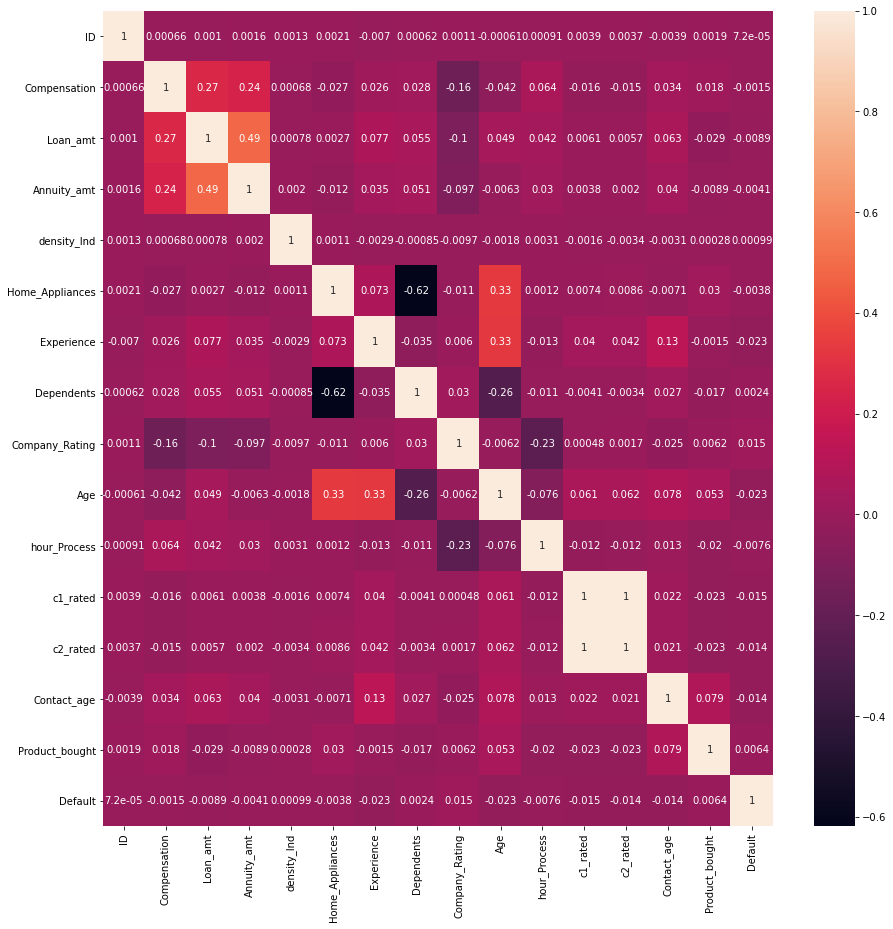

In [56]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr(),annot=True)
plt.show()

In [140]:
num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(exclude=np.number)
num_df.head()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,658040.0,13816.52,0.0304,NaN,0.9,3.0,2.0,46.0,10.0,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,3.0,1.0,46.0,12.0,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,101056.0,8390.40,0.0118,4.0,NaN,2.0,3.0,57.0,5.0,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,4.0,2.0,39.0,12.0,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,3.0,1.0,32.0,16.0,NaN,0.200,2339.0,6.0,0.0


# MISSING VALUE TREATMENT

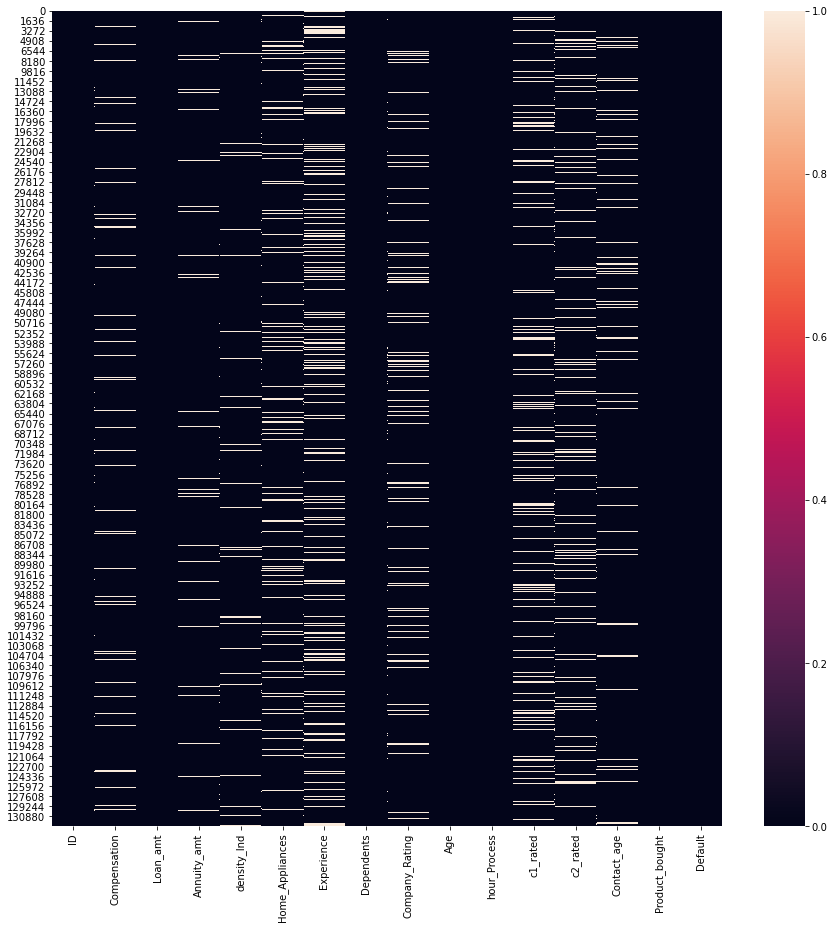

In [6]:
nul=num_df.isnull()
plt.figure(figsize=(15,15))
sb.heatmap(nul)
plt.show()

In [5]:
df1=df.dropna(thresh=29)
df1.shape

(132206, 33)

In [104]:
pd.DataFrame(data=df1.isnull().sum()/len(df1)*100,columns=['Percentage of missing values'])

,Percentage of missing values
ID,0.000000
Compensation,4.672254
Vehicle_Status,6.821173
Loan_amt,0.000000
Annuity_amt,3.449163
density_Ind,4.045202
Job_Type,7.685733
Default_hist,0.000000
Prop_List,1.462869
Home_Appliances,8.214453


In [91]:
df1.shape

(132414, 33)

In [6]:
df1=df1.drop(['c1_rated'],1)

In [63]:
# the c1_rated and c2_rated are highly correlated ,so ,its better to drop any one of the column

In [62]:
df1.shape

(132440, 32)

In [64]:
# now, we have missing values on 
#(COMPENSATION,CONTACT_AGE,C2_RATED,COMPANY_RATING,INCOME_ALT,EXPERIANCE,CREDIT_INQ,Home_Appliances,
#PROP_LIST,JOB_TYPE,DENSITY_IND,ANNUITY_AMT,VEHICLE_STATUS,)

In [65]:
df1.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,2.0,East,46.0,10.0,Yes,No,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,1.0,North,46.0,12.0,Yes,Yes,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,3.0,North,57.0,5.0,Yes,Yes,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,2.0,South,39.0,12.0,Yes,Yes,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,1.0,North,32.0,16.0,Yes,Yes,0.200,2339.0,6.0,0.0


In [71]:
cat_df.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,North,Yes,Yes


In [185]:
df1.groupby('Region')['Compensation'].mean()

Region
Central    728298.940608
East       780100.086371
North      734110.974805
South      747027.137052
Name: Compensation, dtype: float64

<AxesSubplot:xlabel='Compensation', ylabel='Density'>

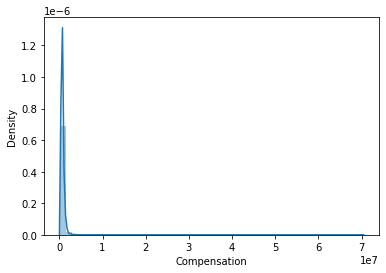

In [187]:
sb.distplot(df1['Compensation'])

<AxesSubplot:ylabel='Density'>

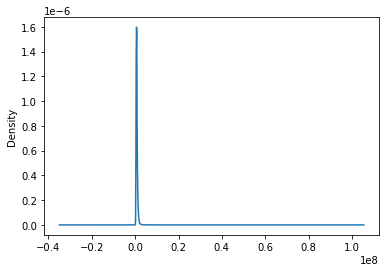

In [126]:
df1['Compensation'].fillna(df1.groupby('Region')['Compensation'].transform('mean')).plot(kind='kde')

In [188]:
df1['Compensation'].fillna(df1.groupby('Region')['Compensation'].transform('mean')).isnull().sum()

0

In [7]:
df1['Compensation']=df1['Compensation'].fillna(df1.groupby('Region')['Compensation'].transform('mean'))

<AxesSubplot:xlabel='Compensation', ylabel='Density'>

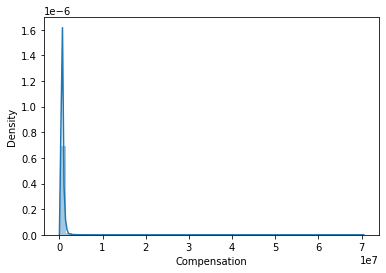

In [190]:
sb.distplot(df1['Compensation'])

In [129]:
df1['Compensation'].isnull().sum()

0

In [132]:
df1['Contact_age'].isnull().sum()

8069

In [146]:
df1.groupby('Region')['Contact_age'].mean()

Region
Central    1024.057838
East        972.361173
North       958.865144
South       983.647646
Name: Contact_age, dtype: float64

In [147]:
df1['Contact_age'].fillna(df1.groupby('Region')['Contact_age'].transform('mean')).isnull().sum()

0

<AxesSubplot:xlabel='Contact_age', ylabel='Density'>

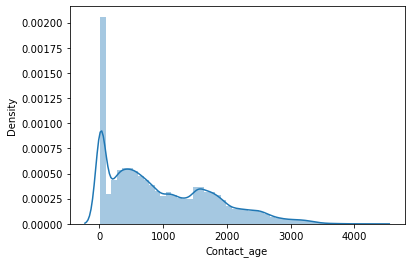

In [191]:
sb.distplot(df1['Contact_age'])

<AxesSubplot:ylabel='Density'>

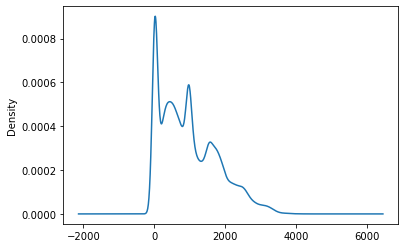

In [151]:
df1['Contact_age'].fillna(df1.groupby('Region')['Contact_age'].transform('mean')).plot(kind='kde')

In [8]:
df1['Contact_age']=df1['Contact_age'].fillna(df1.groupby('Region')['Contact_age'].transform('mean'))

In [193]:
df1['Contact_age'].isnull().sum()

0

In [194]:
num_df1=df1.select_dtypes(include=np.number)
cat_df1=df1.select_dtypes(exclude=np.number)

num of null values 13208
AxesSubplot(0.125,0.125;0.775x0.755)
Vehicle_Status
N    0.432
Y    0.529
Name: c2_rated, dtype: float64----------Job_Type
Govt.     0.433
IT        0.522
Non-IT    0.500
Name: c2_rated, dtype: float64----------Default_hist
df     0.5065
ndf    0.5000
Name: c2_rated, dtype: float64----------Prop_List
Morethan_One    0.529
None            0.519
One             0.500
Name: c2_rated, dtype: float64----------Region_Type
Metro    0.5000
Rural    0.5000
other    0.5605
Name: c2_rated, dtype: float64----------Credit_Inq
1     0.5000
2     0.5120
3     0.5000
>4    0.5395
Name: c2_rated, dtype: float64----------Education_det
Grad      0.507
Other     0.416
P_Grad    0.500
Name: c2_rated, dtype: float64----------Marital_Stat
Divorce    0.418
Married    0.527
Single     0.416
Widow      0.433
Name: c2_rated, dtype: float64----------Gen
F    0.517
M    0.500
Name: c2_rated, dtype: float64----------Credit_Lnks
1_to_3    0.5000
4_to_6    0.4260
>6        0.4115
Name: c2_rat

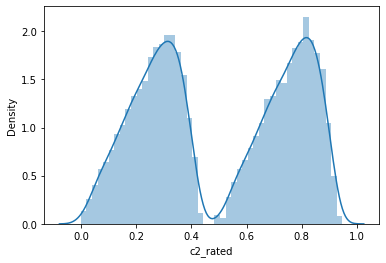

In [195]:
i='c2_rated'    
print('num of null values',df1[i].isnull().sum())
print(sb.distplot(df1[i]))
for j in cat_df1.columns:
    print(df1.groupby(j)[i].median(),end='-'*10)

<AxesSubplot:ylabel='Density'>

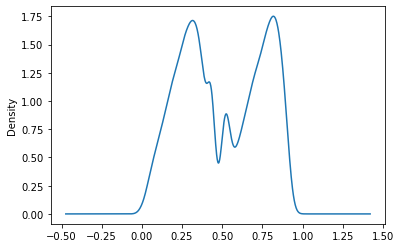

In [179]:
df1['c2_rated'].fillna(df1.groupby('Day_Process')['c2_rated'].transform('median')).plot(kind='kde')

In [176]:
df1['c2_rated'].fillna(df1.groupby('Day_Process')['c2_rated'].transform('median')).isnull().sum()

0

In [9]:
df1['c2_rated']=df1['c2_rated'].fillna(df1.groupby('Day_Process')['c2_rated'].transform('median'))

In [197]:
df1['c2_rated'].isnull().sum()

0

num of null values 11629
AxesSubplot(0.125,0.125;0.775x0.755)
Vehicle_Status
N    2.0
Y    2.0
Name: Company_Rating, dtype: float64----------Job_Type
Govt.     2.0
IT        2.0
Non-IT    2.0
Name: Company_Rating, dtype: float64----------Default_hist
df     2.0
ndf    2.0
Name: Company_Rating, dtype: float64----------Prop_List
Morethan_One    2.0
None            2.0
One             2.0
Name: Company_Rating, dtype: float64----------Region_Type
Metro    2.0
Rural    2.0
other    2.0
Name: Company_Rating, dtype: float64----------Credit_Inq
1     2.0
2     2.0
3     2.0
>4    2.0
Name: Company_Rating, dtype: float64----------Education_det
Grad      2.0
Other     2.0
P_Grad    2.0
Name: Company_Rating, dtype: float64----------Marital_Stat
Divorce    2.0
Married    2.0
Single     2.0
Widow      2.0
Name: Company_Rating, dtype: float64----------Gen
F    2.0
M    2.0
Name: Company_Rating, dtype: float64----------Credit_Lnks
1_to_3    2.0
4_to_6    2.0
>6        2.0
Name: Company_Rating, dtype:

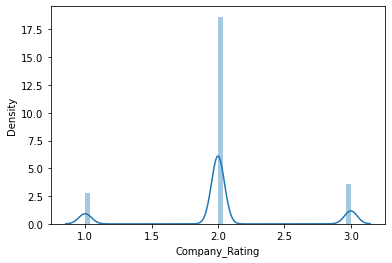

In [208]:
i='Company_Rating'    
print('num of null values',df1[i].isnull().sum())
print(sb.distplot(df1[i]))
for j in cat_df1.columns:
    print(df1.groupby(j)[i].median(),end='-'*10)

<AxesSubplot:xlabel='Company_Rating', ylabel='hour_Process'>

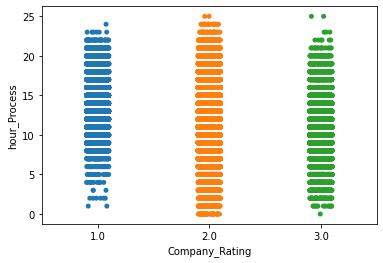

In [207]:
sb.stripplot(df1['Company_Rating'],df1['hour_Process'])

In [209]:
df1['Company_Rating'].fillna(df1.groupby('Region')['Company_Rating'].transform('median')).isnull().sum()

0

<AxesSubplot:ylabel='Density'>

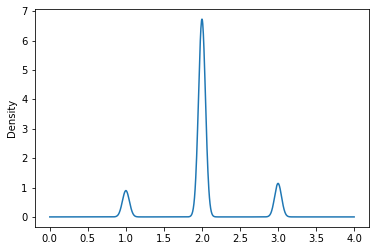

In [210]:
df1['Company_Rating'].fillna(df1.groupby('Region')['Company_Rating'].transform('median')).plot(kind='kde')

In [10]:
df1['Company_Rating']=df1['Company_Rating'].fillna(df1.groupby('Region')['Company_Rating'].transform('median'))

In [212]:
df1['Company_Rating'].isnull().sum()

0

num of null values 21693
AxesSubplot(0.125,0.125;0.775x0.755)
Vehicle_Status
N    4.6
Y    4.6
Name: Experience, dtype: float64----------Job_Type
Govt.     4.8
IT        4.5
Non-IT    4.8
Name: Experience, dtype: float64----------Default_hist
df     4.6
ndf    4.6
Name: Experience, dtype: float64----------Prop_List
Morethan_One    4.3
None            4.6
One             4.7
Name: Experience, dtype: float64----------Region_Type
Metro    4.6
Rural    4.8
other    4.7
Name: Experience, dtype: float64----------Credit_Inq
1      4.4
2      4.2
3     10.1
>4     7.3
Name: Experience, dtype: float64----------Education_det
Grad      4.7
Other     3.5
P_Grad    4.6
Name: Experience, dtype: float64----------Marital_Stat
Divorce    4.9
Married    4.8
Single     3.4
Widow      7.0
Name: Experience, dtype: float64----------Gen
F    4.1
M    5.0
Name: Experience, dtype: float64----------Credit_Lnks
1_to_3    4.8
4_to_6    3.5
>6        4.8
Name: Experience, dtype: float64----------Income_Alt
Not_Spe

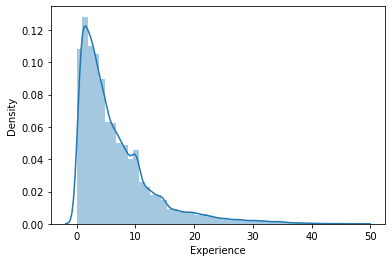

In [217]:
i='Experience'
print('num of null values',df1[i].isnull().sum())
print(sb.distplot(df1[i]))
for j in cat_df1.columns:
    print(df1.groupby(j)[i].median(),end='-'*10)

In [223]:
df1['Experience'].fillna(df1.groupby('Gen')['Experience'].transform('median')).isnull().sum()

0

<AxesSubplot:ylabel='Density'>

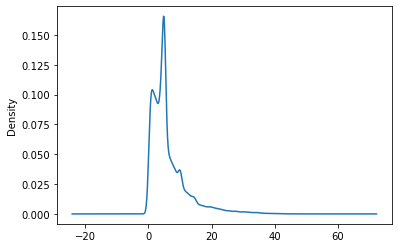

In [226]:
df1['Experience'].fillna(df1.groupby('Gen')['Experience'].transform('median')).plot(kind='kde')

In [11]:
df1['Experience']=df1['Experience'].fillna(df1.groupby('Gen')['Experience'].transform('median'))

In [228]:
df1['Experience'].isnull().sum()

0

num of null values 5348
AxesSubplot(0.125,0.125;0.775x0.755)
Vehicle_Status
N    0.0203
Y    0.0204
Name: density_Ind, dtype: float64----------Job_Type
Govt.     0.0204
IT        0.0203
Non-IT    0.0206
Name: density_Ind, dtype: float64----------Default_hist
df     0.0202
ndf    0.0204
Name: density_Ind, dtype: float64----------Prop_List
Morethan_One    0.0206
None            0.0201
One             0.0203
Name: density_Ind, dtype: float64----------Region_Type
Metro    0.0204
Rural    0.0204
other    0.0211
Name: density_Ind, dtype: float64----------Credit_Inq
1     0.0203
2     0.0204
3     0.0204
>4    0.0207
Name: density_Ind, dtype: float64----------Education_det
Grad      0.0204
Other     0.0205
P_Grad    0.0204
Name: density_Ind, dtype: float64----------Marital_Stat
Divorce    0.0204
Married    0.0203
Single     0.0204
Widow      0.0205
Name: density_Ind, dtype: float64----------Gen
F    0.0204
M    0.0204
Name: density_Ind, dtype: float64----------Credit_Lnks
1_to_3    0.0204
4_t

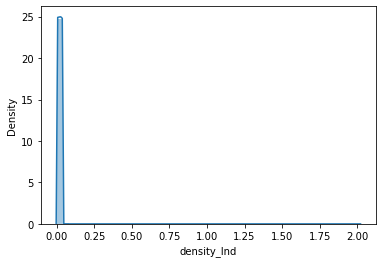

In [232]:
i='density_Ind'
print('num of null values',df1[i].isnull().sum())
print(sb.distplot(df1[i]))
for j in cat_df1.columns:
    print(df1.groupby(j)[i].median(),end='-'*10)

In [233]:
df1['density_Ind'].fillna(df1.groupby('Gen')['density_Ind'].transform('median')).isnull().sum()

0

<AxesSubplot:ylabel='Density'>

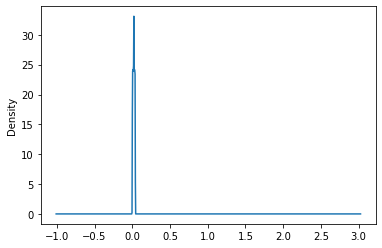

In [234]:
df1['density_Ind'].fillna(df1.groupby('Gen')['density_Ind'].transform('median')).plot(kind='kde')

In [235]:
df1['density_Ind']=df1['density_Ind'].fillna(df1.groupby('Gen')['density_Ind'].transform('median'))

In [236]:
df1['density_Ind'].isnull().sum()

0

num of null values 4560
AxesSubplot(0.125,0.125;0.775x0.755)
Vehicle_Status
N    10653.16
Y    11019.48
Name: Annuity_amt, dtype: float64----------Job_Type
Govt.     10730.16
IT        10698.89
Non-IT    10996.25
Name: Annuity_amt, dtype: float64----------Default_hist
df     10848.12
ndf    10765.11
Name: Annuity_amt, dtype: float64----------Prop_List
Morethan_One    10808.300
None            10847.475
One             10755.610
Name: Annuity_amt, dtype: float64----------Region_Type
Metro    10756.370
Rural    10883.095
other    10629.730
Name: Annuity_amt, dtype: float64----------Credit_Inq
1     10734.29
2     11048.09
3     10475.29
>4    10965.78
Name: Annuity_amt, dtype: float64----------Education_det
Grad      10674.850
Other     10745.770
P_Grad    11088.495
Name: Annuity_amt, dtype: float64----------Marital_Stat
Divorce    10622.08
Married    10869.94
Single     10537.26
Widow      10303.02
Name: Annuity_amt, dtype: float64----------Gen
F    10918.33
M    10700.22
Name: Annuity_

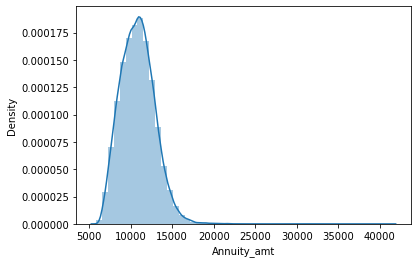

In [242]:
i='Annuity_amt'
print('num of null values',df1[i].isnull().sum())
print(sb.distplot(df1[i]))
for j in cat_df1.columns:
    print(df1.groupby(j)[i].median(),end='-'*10)

In [245]:
df1['Annuity_amt'].fillna(df1.groupby('Education_det')['Annuity_amt'].transform('median')).isnull().sum()

0

<AxesSubplot:ylabel='Density'>

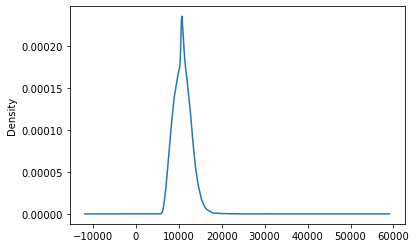

In [246]:
df1['Annuity_amt'].fillna(df1.groupby('Education_det')['Annuity_amt'].transform('median')).plot(kind='kde')

In [247]:
df1['Annuity_amt']=df1['Annuity_amt'].fillna(df1.groupby('Education_det')['Annuity_amt'].transform('median'))

In [248]:
df1['Annuity_amt'].isnull().sum()

0

In [249]:
df1.isnull().sum()/len(df1)*100

ID                    0.000000
Compensation          0.000000
Vehicle_Status        6.821173
Loan_amt              0.000000
Annuity_amt           0.000000
density_Ind           0.000000
Job_Type              7.685733
Default_hist          0.000000
Prop_List             1.462869
Home_Appliances       8.214453
Region_Type           0.000000
Credit_Inq            2.008230
Education_det         0.000000
Marital_Stat          0.000000
Gen                   0.000000
Credit_Lnks           0.000000
Experience            0.000000
Income_Alt            5.741797
Day_Process           0.000000
Ph.No                 0.000000
Type_Loan             0.000000
Dependents            0.000000
Company_Rating        0.000000
Region                0.000000
Age                   0.000000
hour_Process          0.000000
Addr_permanent        0.000000
Permanent_Addr_tag    0.000000
c2_rated              0.000000
Contact_age           0.000000
Product_bought        0.000000
Default               0.000000
dtype: f

num of null values 10860
AxesSubplot(0.125,0.125;0.775x0.755)
Vehicle_Status
N    4.0
Y    4.0
Name: Home_Appliances, dtype: float64----------Job_Type
Govt.     4.0
IT        4.0
Non-IT    4.0
Name: Home_Appliances, dtype: float64----------Default_hist
df     2.0
ndf    4.0
Name: Home_Appliances, dtype: float64----------Prop_List
Morethan_One    1.0
None            2.0
One             4.0
Name: Home_Appliances, dtype: float64----------Region_Type
Metro    4.0
Rural    4.0
other    4.0
Name: Home_Appliances, dtype: float64----------Credit_Inq
1     4.0
2     4.0
3     4.0
>4    4.0
Name: Home_Appliances, dtype: float64----------Education_det
Grad      4.0
Other     4.0
P_Grad    4.0
Name: Home_Appliances, dtype: float64----------Marital_Stat
Divorce    4.0
Married    4.0
Single     4.0
Widow      4.0
Name: Home_Appliances, dtype: float64----------Gen
F    4.0
M    4.0
Name: Home_Appliances, dtype: float64----------Credit_Lnks
1_to_3    4.0
4_to_6    4.0
>6        4.0
Name: Home_Applianc

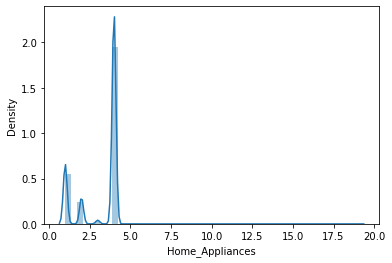

In [353]:
i='Home_Appliances'
print('num of null values',df1[i].isnull().sum())
print(sb.distplot(df1[i]))
for j in cat_df1.columns:
    print(df1.groupby(j)[i].median(),end='-'*10)

In [354]:
df1['Home_Appliances'].fillna(df1.groupby('Default_hist')['Home_Appliances'].transform('median')).isnull().sum()

0

<AxesSubplot:ylabel='Density'>

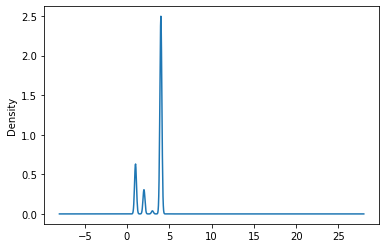

In [355]:
df1['Home_Appliances'].fillna(df1.groupby('Default_hist')['Home_Appliances'].transform('median')).plot(kind='kde')

In [357]:
df1['Home_Appliances']=df1['Home_Appliances'].fillna(df1.groupby('Default_hist')['Home_Appliances'].transform('median'))

In [358]:
df1['Home_Appliances'].isnull().sum()

0

In [250]:
df1.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,2.0,East,46.0,10.0,Yes,No,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,1.0,North,46.0,12.0,Yes,Yes,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,3.0,North,57.0,5.0,Yes,Yes,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,2.0,South,39.0,12.0,Yes,Yes,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,1.0,North,32.0,16.0,Yes,Yes,0.200,2339.0,6.0,0.0


In [288]:
df1['Vehicle_Status'].value_counts(normalize=True)*100

N    65.964217
Y    34.035783
Name: Vehicle_Status, dtype: float64

In [269]:
df1['Job_Type'].isnull().sum()

10161

In [263]:
df1['Prop_List'].value_counts()


One             91387
Morethan_One    25874
None            13011
Name: Prop_List, dtype: int64

In [267]:
df1['Home_Appliances'].value_counts()

4.0     85196
1.0     24032
2.0     10577
3.0      1483
5.0        31
6.0        15
10.0        3
14.0        2
7.0         2
12.0        2
8.0         1
9.0         1
19.0        1
Name: Home_Appliances, dtype: int64

In [256]:
df1['Credit_Inq'].unique()

array(['1', '2', '3', '>4', nan], dtype=object)

In [262]:
df1['Income_Alt'].value_counts()

Not_Specified    89756
Y                34859
Name: Income_Alt, dtype: int64

In [304]:
i='Vehicle_Status'
print('num of null values',df1[i].isnull().sum())

for j in num_df1.columns:
    print(df1.groupby(i)[j].mean(),end='-'*10)

num of null values 9018
Vehicle_Status
N    488713.377418
Y    489306.090107
Name: ID, dtype: float64----------Vehicle_Status
N    697066.004087
Y    838602.033971
Name: Compensation, dtype: float64----------Vehicle_Status
N    394285.677491
Y    454539.859670
Name: Loan_amt, dtype: float64----------Vehicle_Status
N    10712.112882
Y    11099.738404
Name: Annuity_amt, dtype: float64----------Vehicle_Status
N    0.020428
Y    0.020412
Name: density_Ind, dtype: float64----------Vehicle_Status
N    3.30276
Y    3.06306
Name: Home_Appliances, dtype: float64----------Vehicle_Status
N    6.337065
Y    6.224862
Name: Experience, dtype: float64----------Vehicle_Status
N    2.061728
Y    2.334717
Name: Dependents, dtype: float64----------Vehicle_Status
N    2.033867
Y    2.015264
Name: Company_Rating, dtype: float64----------Vehicle_Status
N    45.008664
Y    41.821193
Name: Age, dtype: float64----------Vehicle_Status
N    12.028157
Y    12.109569
Name: hour_Process, dtype: float64----------Veh

In [314]:
vehsta=df1[df1['Vehicle_Status'].isnull()].index

In [316]:
for i in vehsta:
    if df1.loc[i,'Compensation']>400000:
        df1.loc[i,'Vehicle_Status']='Y'
    else:
        df1.loc[i,'Vehicle_Status']='N'

In [317]:
df1['Vehicle_Status'].isnull().sum()

0

In [318]:
i='Job_Type'
print('num of null values',df1[i].isnull().sum())

for j in num_df1.columns:
    print(df1.groupby(i)[j].mean(),end='-'*10)

num of null values 10161
Job_Type
Govt.     488859.058111
IT        489147.005904
Non-IT    488607.761707
Name: ID, dtype: float64----------Job_Type
Govt.     705569.795364
IT        717535.272431
Non-IT    844023.794646
Name: Compensation, dtype: float64----------Job_Type
Govt.     407413.126154
IT        402769.931437
Non-IT    449841.750628
Name: Loan_amt, dtype: float64----------Job_Type
Govt.     10786.372040
IT        10768.479910
Non-IT    11075.480568
Name: Annuity_amt, dtype: float64----------Job_Type
Govt.     0.020438
IT        0.020426
Non-IT    0.020555
Name: density_Ind, dtype: float64----------Job_Type
Govt.     3.283020
IT        3.199612
Non-IT    3.210398
Name: Home_Appliances, dtype: float64----------Job_Type
Govt.     6.457099
IT        6.167535
Non-IT    6.420158
Name: Experience, dtype: float64----------Job_Type
Govt.     2.109295
IT        2.162183
Non-IT    2.183686
Name: Dependents, dtype: float64----------Job_Type
Govt.     2.027012
IT        2.037396
Non-IT  

In [321]:
jobtype=df1[df1['Job_Type'].isnull()].index

In [327]:
for i in jobtype:
    if df1.loc[i,'Compensation']<=401000:
        df1.loc[i,'Job_Type']='IT'
    elif df1.loc[i,'Compensation']>401000 and df1.loc[i,'Compensation']<=445000:
        df1.loc[i,'Job_Type']='Govt.'
    else:
        df1.loc[i,'Job_Type']='Non-IT'

In [328]:
df1['Job_Type'].isnull().sum()

0

In [329]:
i='Prop_List'
print('num of null values',df1[i].isnull().sum())

for j in num_df1.columns:
    print(df1.groupby(i)[j].mean(),end='-'*10)

num of null values 1934
Prop_List
Morethan_One    488576.682384
None            489317.153178
One             489017.119459
Name: ID, dtype: float64----------Prop_List
Morethan_One    762417.664412
None            768399.946130
One             737160.084650
Name: Compensation, dtype: float64----------Prop_List
Morethan_One    412844.442829
None            416605.001622
One             415216.381447
Name: Loan_amt, dtype: float64----------Prop_List
Morethan_One    10871.213768
None            10927.828182
One             10824.522902
Name: Annuity_amt, dtype: float64----------Prop_List
Morethan_One    0.020463
None            0.020362
One             0.020448
Name: density_Ind, dtype: float64----------Prop_List
Morethan_One    1.013280
None            2.122896
One             4.000000
Name: Home_Appliances, dtype: float64----------Prop_List
Morethan_One    5.890021
None            5.920490
One             6.459738
Name: Experience, dtype: float64----------Prop_List
Morethan_One    2.801

In [332]:
proplist=df1[df1['Prop_List'].isnull()].index

In [334]:
for i in proplist:
    if df1.loc[i,'Experience']<=1.7:
        df1.loc[i,'Prop_List']='One'
    elif df1.loc[i,'Experience']>1.7 and df1.loc[i,'Experience']<=2.8:
        df1.loc[i,'Prop_List']='Morethan_One'
    else:
        df1.loc[i,'Prop_List']='None'

In [335]:
df1['Prop_List'].isnull().sum()

0

In [338]:
i='Credit_Inq'
print('num of null values',df1[i].isnull().sum())

for j in num_df1.columns:
    print(df1.groupby(i)[j].mean(),end='-'*10)

num of null values 2655
Credit_Inq
1     488392.158697
2     489404.080587
3     489437.790743
>4    490227.006352
Name: ID, dtype: float64----------Credit_Inq
1     724082.349217
2     861561.703006
3     636911.329030
>4    786777.454052
Name: Compensation, dtype: float64----------Credit_Inq
1     401622.071902
2     456136.849570
3     380584.799074
>4    460691.429592
Name: Loan_amt, dtype: float64----------Credit_Inq
1     10785.815124
2     11132.852765
3     10554.722301
>4    11032.757252
Name: Annuity_amt, dtype: float64----------Credit_Inq
1     0.020403
2     0.020568
3     0.020388
>4    0.020518
Name: density_Ind, dtype: float64----------Credit_Inq
1     3.067291
2     3.126209
3     3.864311
>4    3.024788
Name: Home_Appliances, dtype: float64----------Credit_Inq
1     6.408810
2     5.807927
3     5.306442
>4    9.499956
Name: Experience, dtype: float64----------Credit_Inq
1     2.265490
2     2.188629
3     1.724851
>4    2.331727
Name: Dependents, dtype: float64-------

In [13]:
credin=df1[df1['Credit_Inq'].isnull()].index

In [14]:
for i in credin:
    if df1.loc[i,'Compensation']<=380000:
        df1.loc[i,'Credit_Inq']='3'
    elif df1.loc[i,'Compensation']>380000 and df1.loc[i,'Compensation']<=401000:
        df1.loc[i,'Credit_Inq']='1'
    elif df1.loc[i,'Compensation']>401000 and df1.loc[i,'Compensation']<=455000:
        df1.loc[i,'Credit_Inq']='2'
    else:
        df1.loc[i,'Credit_Inq']='>4'

In [345]:
df1['Credit_Inq'].isnull().sum()

0

In [346]:
i='Income_Alt'
print('num of null values',df1[i].isnull().sum())

for j in num_df1.columns:
    print(df1.groupby(i)[j].mean(),end='-'*10)

num of null values 7591
Income_Alt
Not_Specified    488977.339041
Y                488619.942511
Name: ID, dtype: float64----------Income_Alt
Not_Specified    743923.298715
Y                749011.701241
Name: Compensation, dtype: float64----------Income_Alt
Not_Specified    410095.472826
Y                426101.417564
Name: Loan_amt, dtype: float64----------Income_Alt
Not_Specified    10831.643234
Y                10876.557747
Name: Annuity_amt, dtype: float64----------Income_Alt
Not_Specified    0.020454
Y                0.020402
Name: density_Ind, dtype: float64----------Income_Alt
Not_Specified    3.193007
Y                3.289001
Name: Home_Appliances, dtype: float64----------Income_Alt
Not_Specified    6.127945
Y                6.717227
Name: Experience, dtype: float64----------Income_Alt
Not_Specified    2.164524
Y                2.135862
Name: Dependents, dtype: float64----------Income_Alt
Not_Specified    2.050804
Y                1.968502
Name: Company_Rating, dtype: float64

In [349]:
incomealt=df1[df1['Income_Alt'].isnull()].index

In [351]:
for i in incomealt:
    if df1.loc[i,'Compensation']<=410000:
        df1.loc[i,'Income_Alt']='Not_Specified'
    else:
        df1.loc[i,'Income_Alt']='Y'

In [352]:
df1['Income_Alt'].isnull().sum()

0

In [360]:
pd.DataFrame(data=df1.isnull().sum()/len(df1)*100,columns=['Percentage of missing values'])

,Percentage of missing values
ID,0.0
Compensation,0.0
Vehicle_Status,0.0
Loan_amt,0.0
Annuity_amt,0.0
density_Ind,0.0
Job_Type,0.0
Default_hist,0.0
Prop_List,0.0
Home_Appliances,0.0


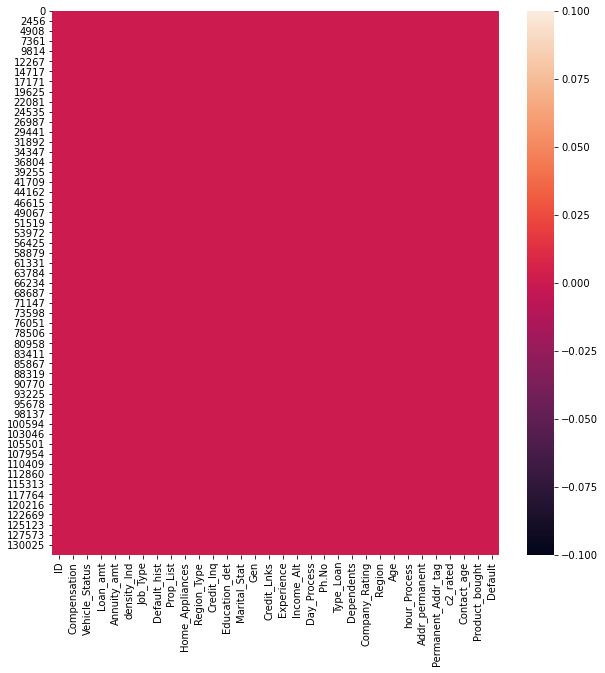

In [380]:
plt.figure(figsize=(10,10))
sb.heatmap(df1.isnull())
plt.show()

# OUTLIER TREATMENT

In [17]:
num_df2=df1.select_dtypes(include=np.number)
cat_df2=df1.select_dtypes(exclude=np.number)
print(num_df2.columns)
cat_df2.columns

Index(['ID', 'Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating', 'Age',
       'hour_Process', 'c2_rated', 'Contact_age', 'Product_bought', 'Default'],
      dtype='object')


Index(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Region', 'Addr_permanent', 'Permanent_Addr_tag'],
      dtype='object')

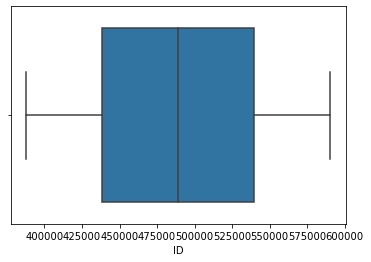

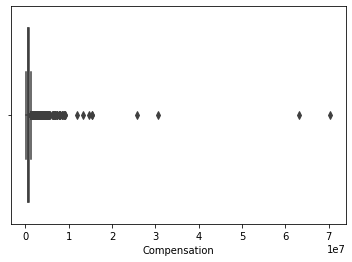

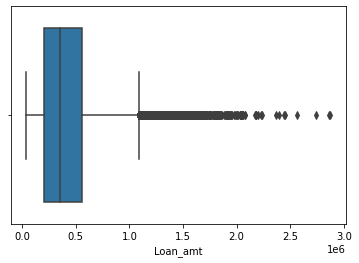

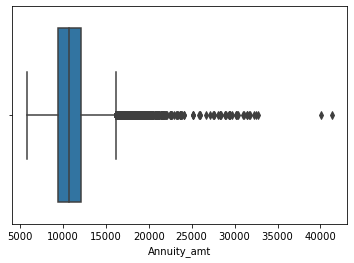

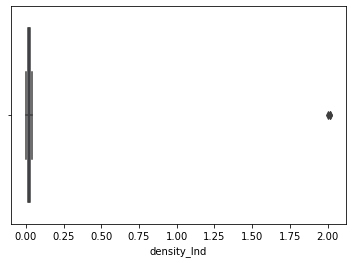

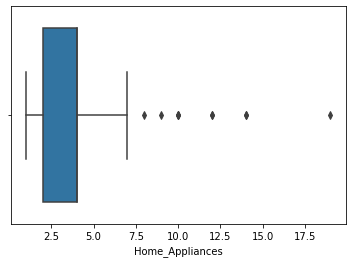

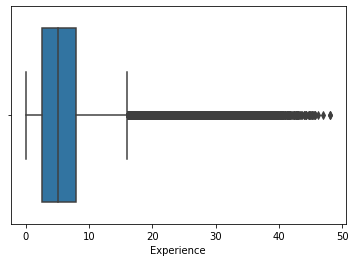

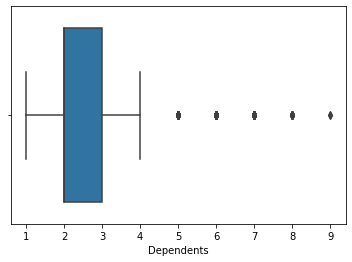

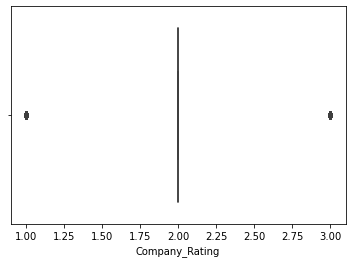

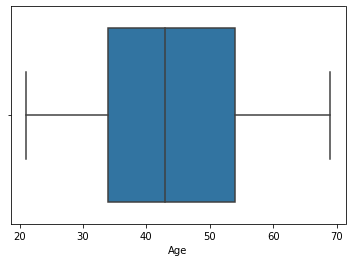

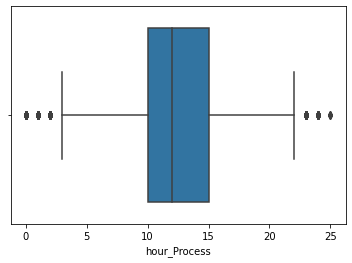

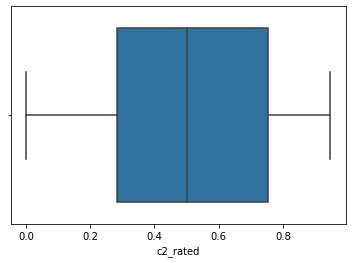

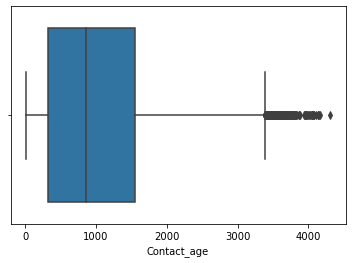

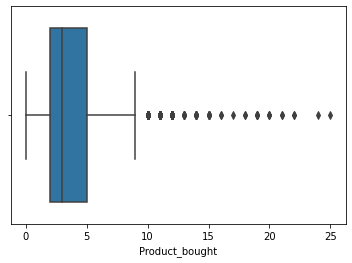

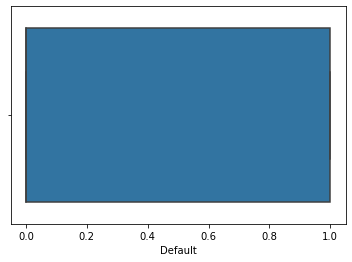

In [362]:
for i in num_df2.columns:
    sb.boxplot(num_df2[i])
    plt.show()

In [15]:
def capping(s):
    q1=num_df2[s].quantile(0.25)
    q3=num_df2[s].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=num_df2[s].quantile(.99)
    lc=num_df2[s].quantile(.01)
    ind1=num_df2[num_df2[s]>uc].index
    ind2=num_df2[num_df2[s]<lc].index
    num_df2.loc[ind1,s]=uc
    num_df2.loc[ind2,s]=lc

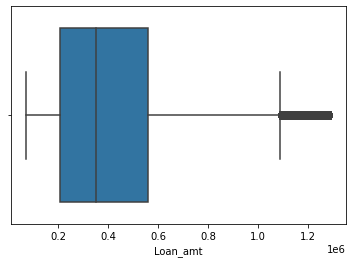

In [18]:
capping('Loan_amt')
sb.boxplot(num_df2['Loan_amt'])
plt.show()

In [19]:
capping('Compensation')
capping('Annuity_amt')

In [20]:
capping('density_Ind')
capping('Home_Appliances')
capping('Experience')
capping('Dependents')
capping('hour_Process')
capping('Contact_age')
capping('Product_bought')

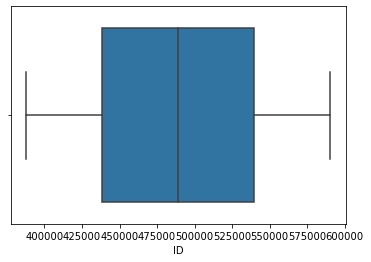

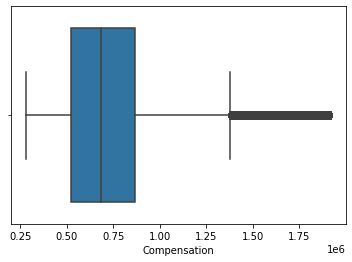

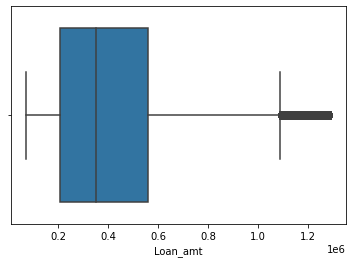

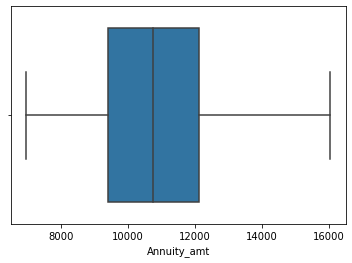

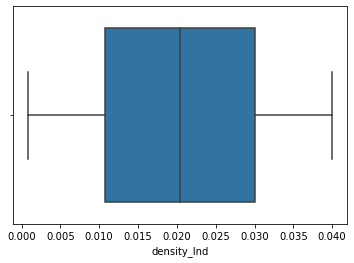

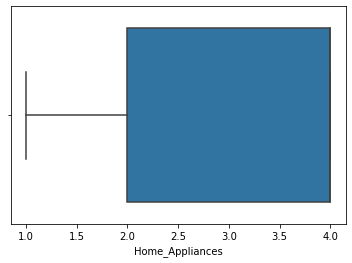

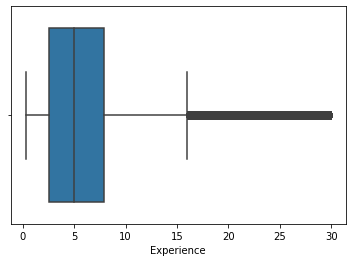

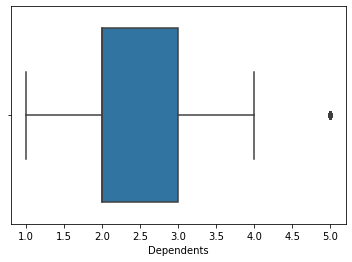

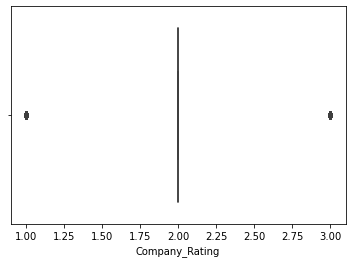

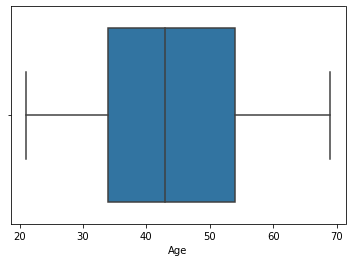

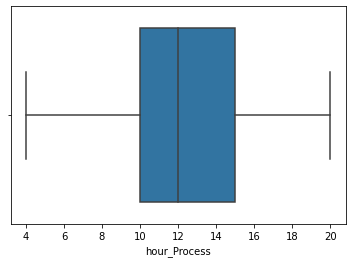

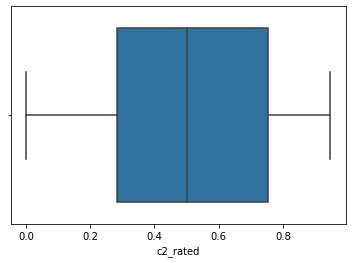

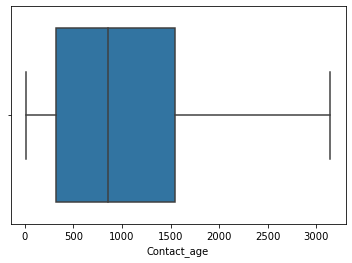

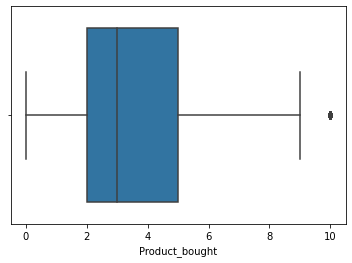

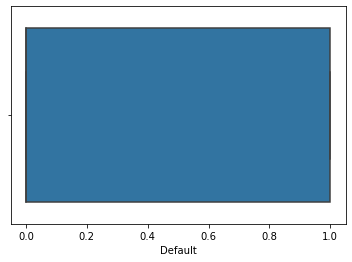

In [367]:
for i in num_df2.columns:
    sb.boxplot(num_df2[i])
    plt.show()

In [368]:
capping('Compensation')
capping('Loan_amt')
capping('Experience')
capping('Dependents')

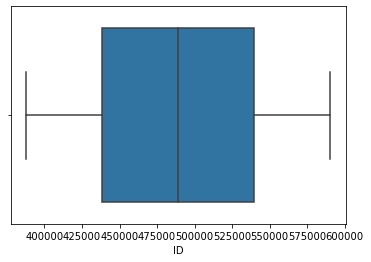

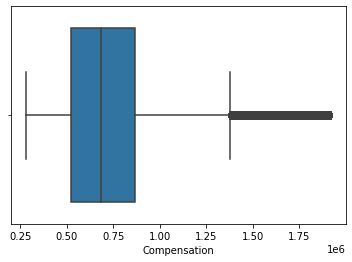

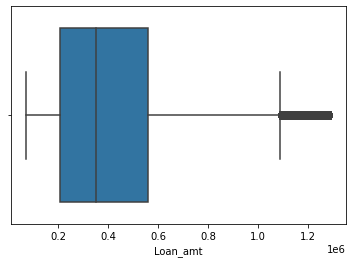

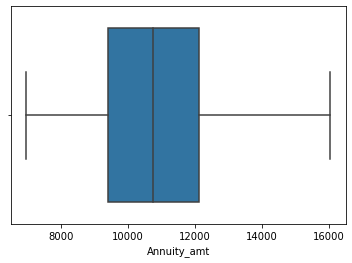

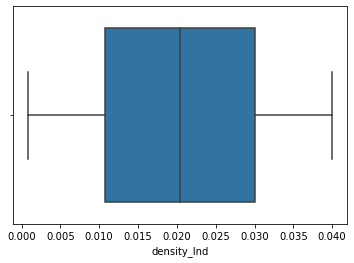

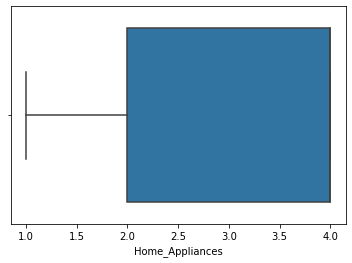

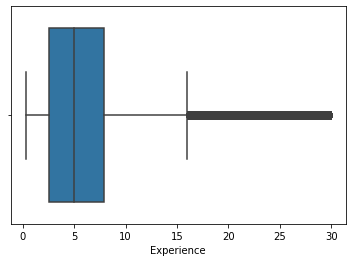

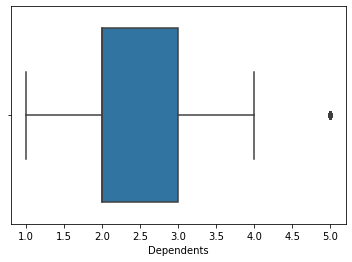

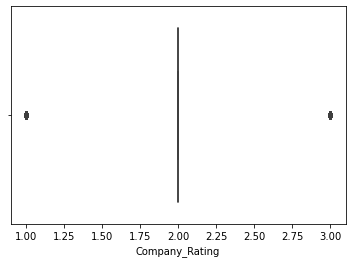

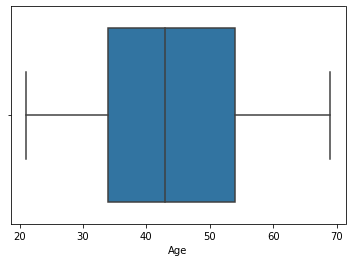

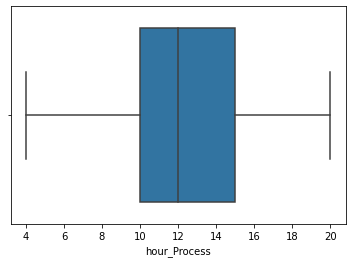

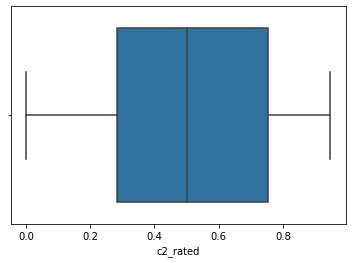

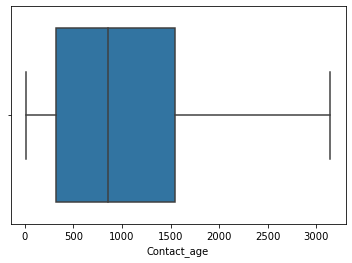

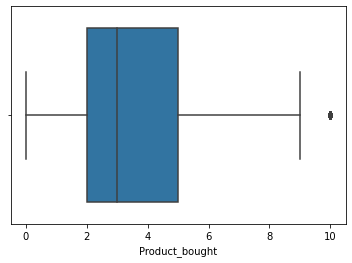

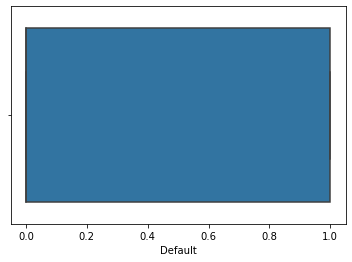

In [369]:
for i in num_df2.columns:
    sb.boxplot(num_df2[i])
    plt.show()

# ENCODING CATEGORICAL FEATURES IN TO NUMERIC

In [370]:
cat_df2.columns

Index(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Region', 'Addr_permanent', 'Permanent_Addr_tag'],
      dtype='object')

In [371]:
cat_df2.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,North,Yes,Yes


In [382]:
for i in cat_df2.columns:
    print(i,cat_df2[i].unique())

Vehicle_Status ['Y' 'N']
Job_Type ['IT' 'Govt.' 'Non-IT']
Default_hist ['ndf' 'df']
Prop_List ['Morethan_One' 'One' 'None']
Region_Type ['Metro' 'Rural' 'other']
Credit_Inq ['1' '2' '3' '>4']
Education_det ['Grad' 'Other' 'P_Grad']
Marital_Stat ['Married' 'Single' 'Widow' 'Divorce']
Gen ['F' 'M']
Credit_Lnks ['1_to_3' '4_to_6' '>6']
Income_Alt ['Not_Specified' 'Y']
Day_Process ['SAT' 'wed' 'mon' 'Sun' 'Tue' 'thur' 'Fri']
Ph.No ['Yes' 'No']
Type_Loan ['CLoan' 'RLoan']
Region ['East' 'North' 'South' 'Central']
Addr_permanent ['Yes' 'No']
Permanent_Addr_tag ['No' 'Yes']


In [383]:
cat_df2['Vehicle_Status']=cat_df2['Vehicle_Status'].replace({'Y':0,'N':1})

In [384]:
cat_df2['Vehicle_Status'].unique()

array([0, 1], dtype=int64)

In [21]:
cat_df2['Job_Type']=cat_df2['Job_Type'].replace({'IT':0,'Govt.':1,'Non-IT':2})
cat_df2['Default_hist']=cat_df2['Default_hist'].replace({'ndf':0,'df':1})
cat_df2['Prop_List']=cat_df2['Prop_List'].replace({'Morethan_One':0,'One':1,'None':2})
cat_df2['Region_Type']=cat_df2['Region_Type'].replace({'Metro':0,'Rural':1,'other':2})
cat_df2['Credit_Inq']=cat_df2['Credit_Inq'].replace({'1':0,'2':1,'3':2,'>4':3})
cat_df2['Education_det']=cat_df2['Education_det'].replace({'Grad':0,'Other':1,'P_Grad':2})
cat_df2['Marital_Stat']=cat_df2['Marital_Stat'].replace({'Married':0,'Single':1,'Widow':2,'Divorce':3})
cat_df2['Gen']=cat_df2['Gen'].replace({'F':0,'M':1})
cat_df2['Credit_Lnks']=cat_df2['Credit_Lnks'].replace({'1_to_3':0,'4_to_6':1,'>6':2})
cat_df2['Income_Alt']=cat_df2['Income_Alt'].replace({'Not_Specified':0,'Y':1})
cat_df2['Day_Process']=cat_df2['Day_Process'].replace({'SAT':0,'wed':1,'mon':2,'Sun':3,'Tue':4,'thur':5,'Fri':6})
cat_df2['Ph.No']=cat_df2['Ph.No'].replace({'Yes':0,'No':1})
cat_df2['Type_Loan']=cat_df2['Type_Loan'].replace({'CLoan':0,'RLoan':1})
cat_df2['Region']=cat_df2['Region'].replace({'East':0,'North':1,'South':2,'Central':3})
cat_df2['Addr_permanent']=cat_df2['Addr_permanent'].replace({'Yes':0,'No':1})
cat_df2['Permanent_Addr_tag']=cat_df2['Permanent_Addr_tag'].replace({'No':0,'Yes':1})

In [22]:
for i in cat_df2.columns:
    print(i,cat_df2[i].unique())

Vehicle_Status ['Y' 'N' nan]
Job_Type [ 0.  1.  2. nan]
Default_hist [0 1]
Prop_List [ 0.  1.  2. nan]
Region_Type [0 1 2]
Credit_Inq [0 1 2 3]
Education_det [0 1 2]
Marital_Stat [0 1 2 3]
Gen [0 1]
Credit_Lnks [0 1 2]
Income_Alt [ 0.  1. nan]
Day_Process [0 1 2 3 4 5 6]
Ph.No [0 1]
Type_Loan [0 1]
Region [0 1 2 3]
Addr_permanent [0 1]
Permanent_Addr_tag [0 1]


In [387]:
cat_df2.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1
2,1,1,0,1,0,2,1,0,1,0,0,2,0,0,1,0,1
3,1,2,1,2,0,0,0,0,1,0,0,1,0,1,2,0,1
4,0,2,0,0,1,1,0,0,0,1,1,3,0,0,1,0,1


In [390]:
df3=df1.copy()

In [391]:
df3.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,4.0,...,2.0,East,46.0,10.0,Yes,No,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,1.0,North,46.0,12.0,Yes,Yes,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,3.0,North,57.0,5.0,Yes,Yes,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,2.0,South,39.0,12.0,Yes,Yes,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,1.0,North,32.0,16.0,Yes,Yes,0.200,2339.0,6.0,0.0


# TEST FOR SIGNIFICANCE

In [394]:
from scipy import stats

In [23]:
final_df=pd.concat([num_df2,cat_df2],axis=1)
final_df.head()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,...,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,540071,801850.0,658040.0,13816.52,0.0304,NaN,0.9,3.0,2.0,46.0,...,0,0,0,0.0,0,0,0,0,0,0
1,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,3.0,1.0,46.0,...,0,1,0,0.0,1,0,0,1,0,1
2,506688,284120.0,101056.0,8390.40,0.0118,4.0,5.0,2.0,3.0,57.0,...,0,1,0,0.0,2,0,0,1,0,1
3,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,4.0,2.0,39.0,...,0,1,0,0.0,1,0,1,2,0,1
4,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,3.0,1.0,32.0,...,0,0,1,1.0,3,0,0,1,0,1


In [395]:
fn_df=final_df.copy()

In [393]:
p_val = []
sig = []
for i in final_df.columns:
    if i in num_df2:
        stat, p = stats.ttest_ind(final_df[final_df['Default'] == 0][i], final_df[final_df['Default'] == 1][i])
    else:
        ct = pd.crosstab(final_df[i], final_df['Default'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df1 = pd.DataFrame({"columns" : final_df.columns, "p_value" : p_val, "significance" : sig})
stats_df1

,columns,p_value,significance
0,ID,9.519357e-01,Insignificant
1,Compensation,2.056084e-01,Insignificant
2,Loan_amt,2.316351e-03,Significant
3,Annuity_amt,2.123807e-01,Insignificant
4,density_Ind,8.063007e-01,Insignificant
5,Home_Appliances,8.274901e-02,Insignificant
6,Experience,1.256845e-12,Significant
7,Dependents,4.111610e-01,Insignificant
8,Company_Rating,7.351571e-08,Significant
9,Age,2.168226e-17,Significant


In [396]:
final_df.columns

Index(['ID', 'Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating', 'Age',
       'hour_Process', 'c2_rated', 'Contact_age', 'Product_bought', 'Default',
       'Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Region', 'Addr_permanent', 'Permanent_Addr_tag'],
      dtype='object')

In [399]:
final_df=final_df.drop(['ID','Compensation','Annuity_amt','density_Ind','Home_Appliances','Dependents','Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type','Marital_Stat','Income_Alt', 'Day_Process','Permanent_Addr_tag'],axis=1)

In [400]:
final_df

,Loan_amt,Experience,Company_Rating,Age,hour_Process,c2_rated,Contact_age,Product_bought,Default,Credit_Inq,Education_det,Gen,Credit_Lnks,Ph.No,Type_Loan,Region,Addr_permanent
0,658040.0,0.9,2.0,46.0,10.0,0.077,18.0,2.0,1.0,0,0,0,0,0,0,0,0
1,198075.0,3.0,1.0,46.0,12.0,0.184,306.0,4.0,0.0,1,0,1,0,0,0,1,0
2,101056.0,5.0,3.0,57.0,5.0,0.538,281.0,4.0,0.0,2,1,1,0,0,0,1,0
3,179008.0,4.7,2.0,39.0,12.0,0.561,20.0,4.0,0.0,0,0,1,0,0,1,2,0
4,573715.0,6.9,1.0,32.0,16.0,0.200,2339.0,6.0,0.0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,1048272.0,4.1,2.0,43.0,7.0,0.886,2766.0,5.0,1.0,2,0,0,0,0,0,1,0
132436,640232.0,5.0,2.0,60.0,9.0,0.641,2581.0,1.0,0.0,2,0,1,0,0,0,1,0
132437,732914.0,2.5,2.0,51.0,4.0,0.384,1987.0,3.0,0.0,0,0,1,0,0,0,2,0
132438,528490.2,5.0,2.0,59.0,14.0,0.224,1608.0,2.0,1.0,0,0,1,0,0,0,3,0


# SCALING FOR NUMERICAL COLUMNS

In [24]:
numdf=num_df2.drop(['ID','Compensation','Annuity_amt','density_Ind','Home_Appliances','Dependents','Default'],axis=1)

In [25]:
catdf=cat_df2.drop(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List','Region_Type','Marital_Stat','Income_Alt', 'Day_Process','Permanent_Addr_tag'],axis=1)

In [475]:
catdf.shape

(132206, 8)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
FIT=sc.fit(numdf)
numdf1=FIT.transform(numdf)
scaled_df=pd.DataFrame(numdf1,columns=numdf.columns)
scaled_df.shape

(132206, 8)

In [480]:
dfdf=pd.concat([scaled_df,catdf],axis=1)
y=num_df2['Default']

In [485]:
print(scaled_df.shape)
catdf.shape

(132206, 8)


(132206, 8)

In [27]:
scaled_df.reset_index(drop=True,inplace=True)
catdf.reset_index(drop=True,inplace=True)

In [28]:
x=pd.concat([scaled_df,catdf],1)

In [29]:
t_df=pd.read_csv('Test_Set_TVS.csv')
t_df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,...,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,...,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,...,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,...,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,...,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [417]:
t_df.isnull().sum()

ID                       0
Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances       4759
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Contact_age           3522
Product_bought           0
dtype: int64

In [418]:
t_df['Compensation'].fillna(t_df.groupby('Region')['Compensation'].transform('mean')).isnull().sum()

0

In [30]:
t_df['Compensation']=t_df['Compensation'].fillna(t_df.groupby('Region')['Compensation'].transform('mean'))

In [31]:
credin=t_df[t_df['Credit_Inq'].isnull()].index

In [32]:
for i in credin:
    if t_df.loc[i,'Compensation']<=380000:
        t_df.loc[i,'Credit_Inq']='3'
    elif t_df.loc[i,'Compensation']>380000 and t_df.loc[i,'Compensation']<=401000:
        t_df.loc[i,'Credit_Inq']='1'
    elif t_df.loc[i,'Compensation']>401000 and t_df.loc[i,'Compensation']<=455000:
        t_df.loc[i,'Credit_Inq']='2'
    else:
        t_df.loc[i,'Credit_Inq']='>4'

In [426]:
t_df['Credit_Inq'].isnull().sum()

0

In [33]:
t_df['Company_Rating']=t_df['Company_Rating'].fillna(t_df.groupby('Region')['Company_Rating'].transform('median'))

In [429]:
t_df['Company_Rating'].isnull().sum()

0

In [34]:
t_df['Experience']=t_df['Experience'].fillna(t_df.groupby('Gen')['Experience'].transform('median'))

In [432]:
t_df['Experience'].isnull().sum()

0

In [35]:
t_df['c2_rated']=t_df['c2_rated'].fillna(t_df.groupby('Day_Process')['c2_rated'].transform('median'))

In [435]:
t_df['c2_rated'].isnull().sum()

0

In [36]:
t_df['Contact_age']=t_df['Contact_age'].fillna(t_df.groupby('Region')['Contact_age'].transform('mean'))

In [438]:
t_df['Contact_age'].isnull().sum()

0

In [37]:
t_df1=t_df.drop(['ID','Compensation','Annuity_amt','density_Ind','Home_Appliances','Dependents','Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List','Region_Type','Marital_Stat','Income_Alt', 'Day_Process','Permanent_Addr_tag'],axis=1)

In [440]:
t_df1.isnull().sum()

Loan_amt             0
Credit_Inq           0
Education_det        0
Gen                  0
Credit_Lnks          0
Experience           0
Ph.No                0
Type_Loan            0
Company_Rating       0
Region               0
Age                  0
hour_Process         0
Addr_permanent       0
c1_rated          7363
c2_rated             0
Contact_age          0
Product_bought       0
dtype: int64

In [38]:
t_df1=t_df1.drop(['c1_rated'],1)

In [39]:
t_df1.isnull().sum()

Loan_amt          0
Credit_Inq        0
Education_det     0
Gen               0
Credit_Lnks       0
Experience        0
Ph.No             0
Type_Loan         0
Company_Rating    0
Region            0
Age               0
hour_Process      0
Addr_permanent    0
c2_rated          0
Contact_age       0
Product_bought    0
dtype: int64

In [40]:
num_tdf=t_df1.select_dtypes(include=np.number)
cat_tdf=t_df1.select_dtypes(exclude=np.number)
print(num_tdf.head())
cat_tdf.head()

    Loan_amt  Experience  Company_Rating   Age  hour_Process  c2_rated  \
0  809400.00         5.4             2.0  39.0          11.0     0.349   
1   72618.75         2.3             3.0  46.0          13.0     0.237   
2  267255.80        11.0             2.0  33.0          15.0     0.111   
3  623600.00         9.7             2.0  48.0          12.0     0.323   
4  529520.00         4.1             3.0  53.0           7.0     0.940   

   Contact_age  Product_bought  
0       3133.0             2.0  
1       1730.0             5.0  
2        759.0             4.0  
3        609.0             4.0  
4       1222.0             1.0  


,Credit_Inq,Education_det,Gen,Credit_Lnks,Ph.No,Type_Loan,Region,Addr_permanent
0,1,Grad,M,1_to_3,Yes,CLoan,North,Yes
1,1,Grad,M,1_to_3,No,CLoan,Central,Yes
2,1,Grad,M,1_to_3,No,CLoan,South,Yes
3,1,Grad,M,1_to_3,Yes,CLoan,East,Yes
4,3,P_Grad,F,1_to_3,Yes,RLoan,North,Yes


In [41]:
scaled_tdf=sc.fit_transform(num_tdf)

In [42]:
scaled_tdf1=pd.DataFrame(scaled_tdf,columns=num_tdf.columns)
scaled_tdf1.head()

,Loan_amt,Experience,Company_Rating,Age,hour_Process,c2_rated,Contact_age,Product_bought
0,1.430659,-0.155630,-0.053829,-0.412734,-0.303673,-0.605169,2.703179,-0.643678
1,-1.239008,-0.691746,2.020383,0.171600,0.259050,-1.044135,0.948321,0.735944
2,-0.533756,0.812838,-0.053829,-0.913592,0.821773,-1.537971,-0.266196,0.276070
3,0.757428,0.588015,-0.053829,0.338552,-0.022312,-0.707072,-0.453814,0.276070
4,0.416537,-0.380453,2.020383,0.755934,-1.429119,1.711158,0.312920,-1.103552


In [452]:
cat_tdf.head()

,Credit_Inq,Education_det,Gen,Credit_Lnks,Ph.No,Type_Loan,Region,Addr_permanent
0,1,Grad,M,1_to_3,Yes,CLoan,North,Yes
1,1,Grad,M,1_to_3,No,CLoan,Central,Yes
2,1,Grad,M,1_to_3,No,CLoan,South,Yes
3,1,Grad,M,1_to_3,Yes,CLoan,East,Yes
4,3,P_Grad,F,1_to_3,Yes,RLoan,North,Yes


In [43]:
cat_tdf['Credit_Inq']=cat_tdf['Credit_Inq'].replace({'1':0,'2':1,'3':2,'>4':3})
cat_tdf['Education_det']=cat_tdf['Education_det'].replace({'Grad':0,'Other':1,'P_Grad':2})
cat_tdf['Gen']=cat_tdf['Gen'].replace({'F':0,'M':1})
cat_tdf['Credit_Lnks']=cat_tdf['Credit_Lnks'].replace({'1_to_3':0,'4_to_6':1,'>6':2})
cat_tdf['Ph.No']=cat_tdf['Ph.No'].replace({'Yes':0,'No':1})
cat_tdf['Type_Loan']=cat_tdf['Type_Loan'].replace({'CLoan':0,'RLoan':1})
cat_tdf['Region']=cat_tdf['Region'].replace({'East':0,'North':1,'South':2,'Central':3})
cat_tdf['Addr_permanent']=cat_tdf['Addr_permanent'].replace({'Yes':0,'No':1})

In [454]:
cat_tdf.head()

,Credit_Inq,Education_det,Gen,Credit_Lnks,Ph.No,Type_Loan,Region,Addr_permanent
0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,3,0
2,0,0,1,0,1,0,2,0
3,0,0,1,0,0,0,0,0
4,2,2,0,0,0,1,1,0


In [44]:
xtest=pd.concat([scaled_tdf1,cat_tdf],axis=1)

In [45]:
y=num_df2['Default']

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

In [76]:
numdf.head()

,Loan_amt,Experience,Company_Rating,Age,hour_Process,c2_rated,Contact_age,Product_bought
0,658040.0,0.9,2.0,46.0,10.0,0.077,18.0,2.0
1,198075.0,3.0,1.0,46.0,12.0,0.184,306.0,4.0
2,101056.0,5.0,3.0,57.0,5.0,0.538,281.0,4.0
3,179008.0,4.7,2.0,39.0,12.0,0.561,20.0,4.0
4,573715.0,6.9,1.0,32.0,16.0,0.200,2339.0,6.0


In [77]:
catdf.head()

,Credit_Inq,Education_det,Gen,Credit_Lnks,Ph.No,Type_Loan,Region,Addr_permanent
0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0
2,2,1,1,0,0,0,1,0
3,0,0,1,0,0,1,2,0
4,1,0,0,1,0,0,1,0


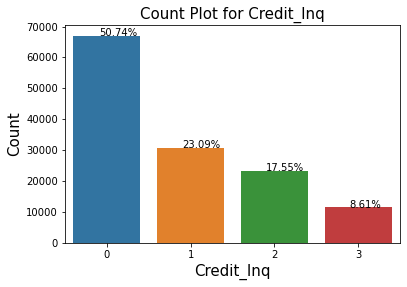

In [82]:
sb.countplot(catdf['Credit_Inq'])
plt.text(x = -0.09, y = catdf['Credit_Inq'].value_counts()[0] , s = str(round((catdf['Credit_Inq'].value_counts()[0])*100/len(catdf['Credit_Inq']),2)) + '%')
plt.text(x = 0.9, y = catdf['Credit_Inq'].value_counts()[1] , s = str(round((catdf['Credit_Inq'].value_counts()[1])*100/len(catdf['Credit_Inq']),2)) + '%')
plt.text(x = 1.9, y = catdf['Credit_Inq'].value_counts()[2] , s = str(round((catdf['Credit_Inq'].value_counts()[2])*100/len(catdf['Credit_Inq']),2)) + '%')
plt.text(x = 2.9, y = catdf['Credit_Inq'].value_counts()[3] , s = str(round((catdf['Credit_Inq'].value_counts()[3])*100/len(catdf['Credit_Inq']),2)) + '%')

plt.title('Count Plot for Credit_Inq', fontsize = 15)
plt.xlabel('Credit_Inq', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [83]:
catdf['Education_det'].unique()

array([0, 1, 2], dtype=int64)

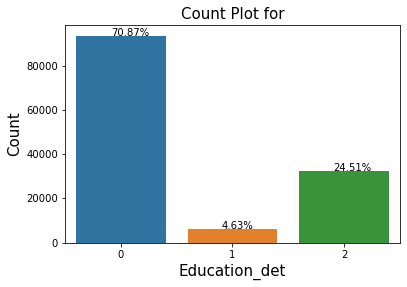

In [86]:
i='Education_det'
sb.countplot(catdf[i])
plt.text(x = -0.09, y = catdf[i].value_counts()[0] , s = str(round((catdf[i].value_counts()[0])*100/len(catdf[i]),2)) + '%')
plt.text(x = 0.9, y = catdf[i].value_counts()[1] , s = str(round((catdf[i].value_counts()[1])*100/len(catdf[i]),2)) + '%')
plt.text(x = 1.9, y = catdf[i].value_counts()[2] , s = str(round((catdf[i].value_counts()[2])*100/len(catdf[i]),2)) + '%')

plt.title('Count Plot for', fontsize = 15)
plt.xlabel(i, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

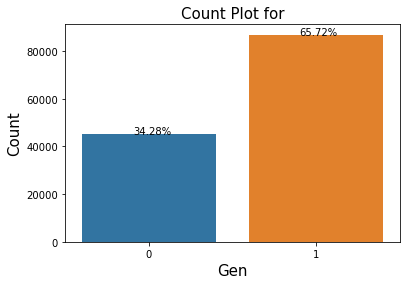

In [87]:
i='Gen'
sb.countplot(catdf[i])
plt.text(x = -0.09, y = catdf[i].value_counts()[0] , s = str(round((catdf[i].value_counts()[0])*100/len(catdf[i]),2)) + '%')
plt.text(x = 0.9, y = catdf[i].value_counts()[1] , s = str(round((catdf[i].value_counts()[1])*100/len(catdf[i]),2)) + '%')

plt.title('Count Plot for', fontsize = 15)
plt.xlabel(i, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

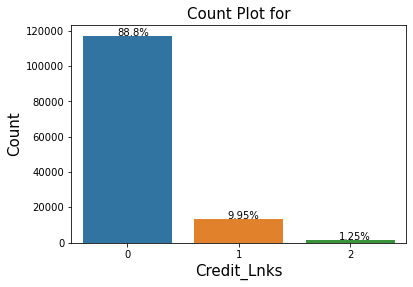

In [89]:
i='Credit_Lnks'
sb.countplot(catdf[i])
plt.text(x = -0.09, y = catdf[i].value_counts()[0] , s = str(round((catdf[i].value_counts()[0])*100/len(catdf[i]),2)) + '%')
plt.text(x = 0.9, y = catdf[i].value_counts()[1] , s = str(round((catdf[i].value_counts()[1])*100/len(catdf[i]),2)) + '%')
plt.text(x = 1.9, y = catdf[i].value_counts()[2] , s = str(round((catdf[i].value_counts()[2])*100/len(catdf[i]),2)) + '%')

plt.title('Count Plot for', fontsize = 15)
plt.xlabel(i, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

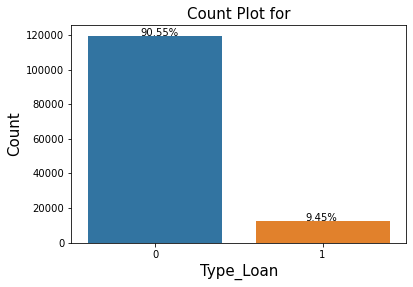

In [91]:
i='Type_Loan'
sb.countplot(catdf[i])
plt.text(x = -0.09, y = catdf[i].value_counts()[0] , s = str(round((catdf[i].value_counts()[0])*100/len(catdf[i]),2)) + '%')
plt.text(x = 0.9, y = catdf[i].value_counts()[1] , s = str(round((catdf[i].value_counts()[1])*100/len(catdf[i]),2)) + '%')

plt.title('Count Plot for', fontsize = 15)
plt.xlabel(i, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

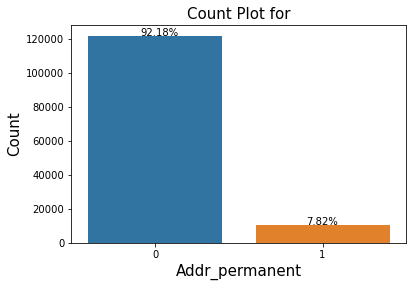

In [95]:
i='Addr_permanent'
sb.countplot(catdf[i])
plt.text(x = -0.09, y = catdf[i].value_counts()[0] , s = str(round((catdf[i].value_counts()[0])*100/len(catdf[i]),2)) + '%')
plt.text(x = 0.9, y = catdf[i].value_counts()[1] , s = str(round((catdf[i].value_counts()[1])*100/len(catdf[i]),2)) + '%')

plt.title('Count Plot for', fontsize = 15)
plt.xlabel(i, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

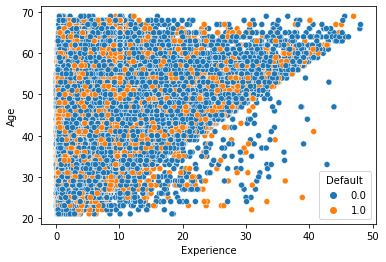

In [132]:
sb.scatterplot(df['Experience'],df['Age'],hue=df['Default'])
plt.show()

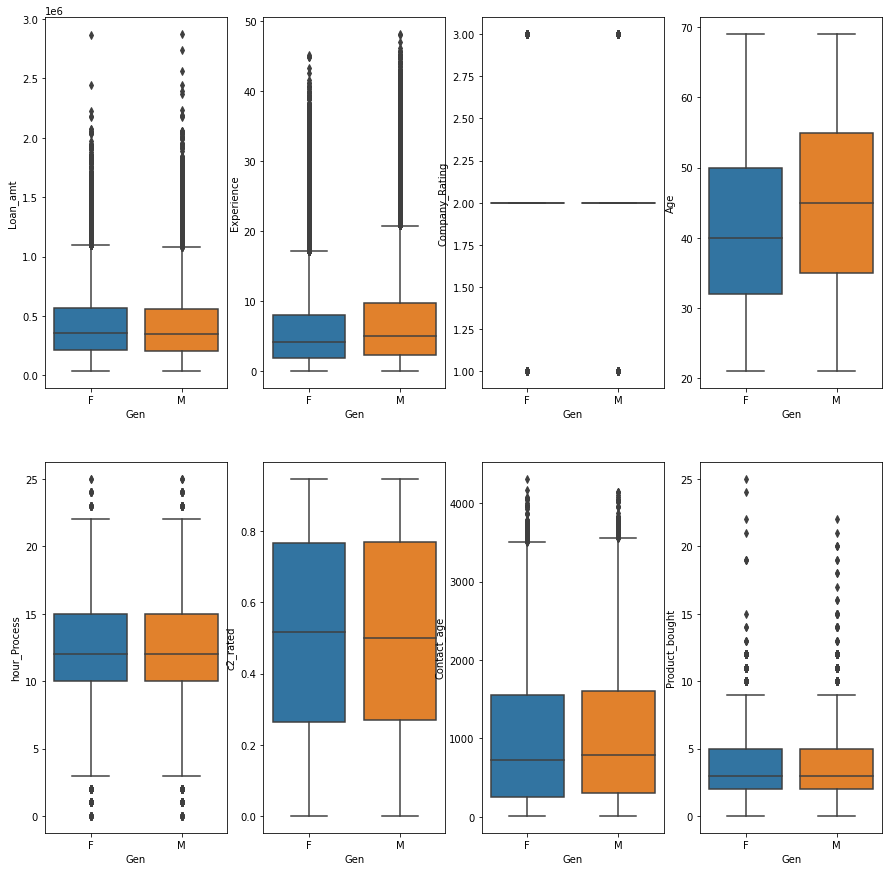

In [134]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(15,15))
for variable, subplot in zip(numdf.columns, ax.flatten()):
  if variable == "Default":
    continue
  else:
    sb.boxplot(x = df["Gen"],y =df[variable], ax = subplot)
plt.show()

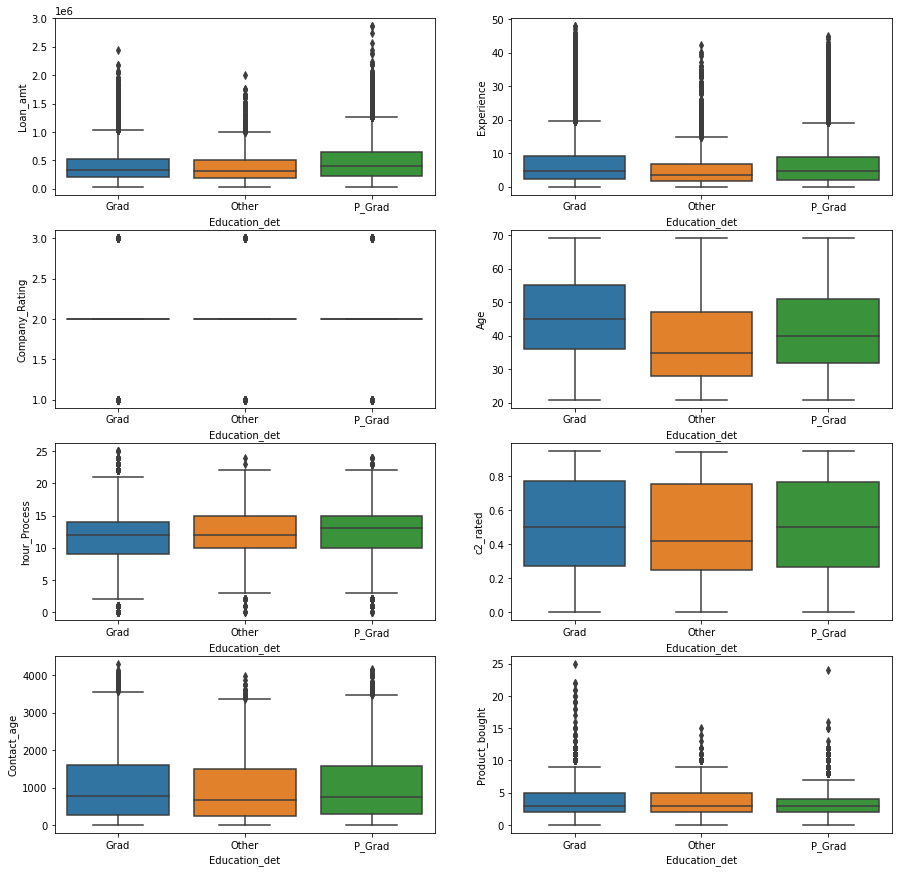

In [129]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(15, 15))
for variable, subplot in zip(numdf.columns, ax.flatten()):
  if variable == "Default":
    continue
  else:
    sb.boxplot(x = df["Education_det"],y =df[variable], ax = subplot)
plt.show()

In [130]:
# post grauated peoples having more loan amount than others
#and the graduated peoples are more tends to buy products

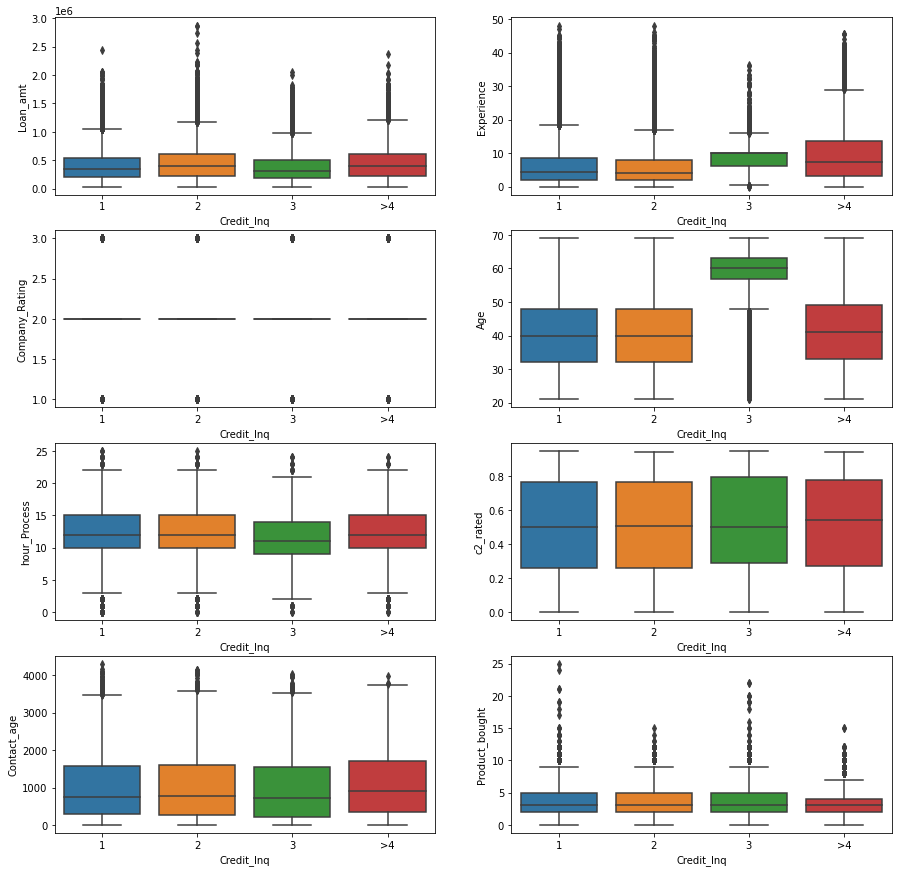

In [125]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(15,15))
for variable, subplot in zip(numdf.columns, ax.flatten()):
  if variable == "Default":
    continue
  else:
    sb.boxplot(x = df["Credit_Inq"],y =df[variable], ax = subplot)
plt.show()

In [126]:
# post grauated peoples having more loan amount than others
#and the graduated peoples are more tends to buy products
# most of the peoples in the creditlnks 3 are in between 55-65 age peoples

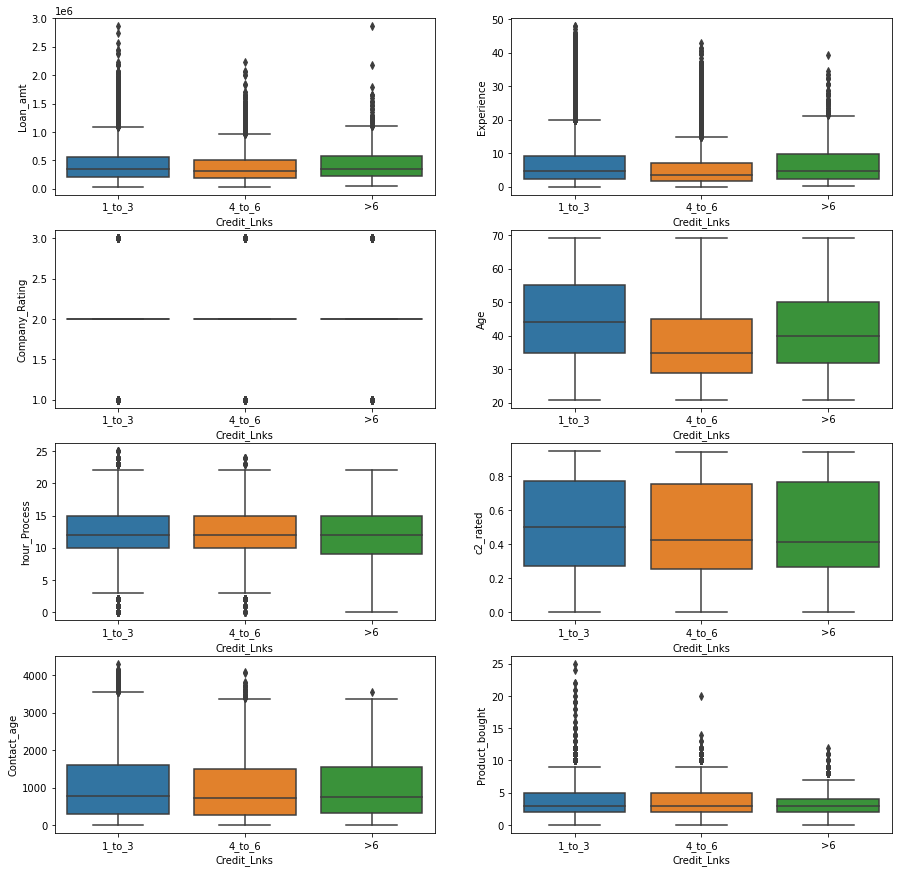

In [123]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(15,15))
for variable, subplot in zip(numdf.columns, ax.flatten()):
  if variable == "Default":
    continue
  else:
    sb.boxplot(x = df["Credit_Lnks"],y = df[variable], ax = subplot)
plt.show()

In [124]:
# post grauated peoples having more loan amount than others
#and the graduated peoples are more tends to buy products
# most of the peoples in the creditlnks 3 are in between 55-65 age peoples
# peoples having credictlnks 1-3 are bought more product than are type of creditlnks

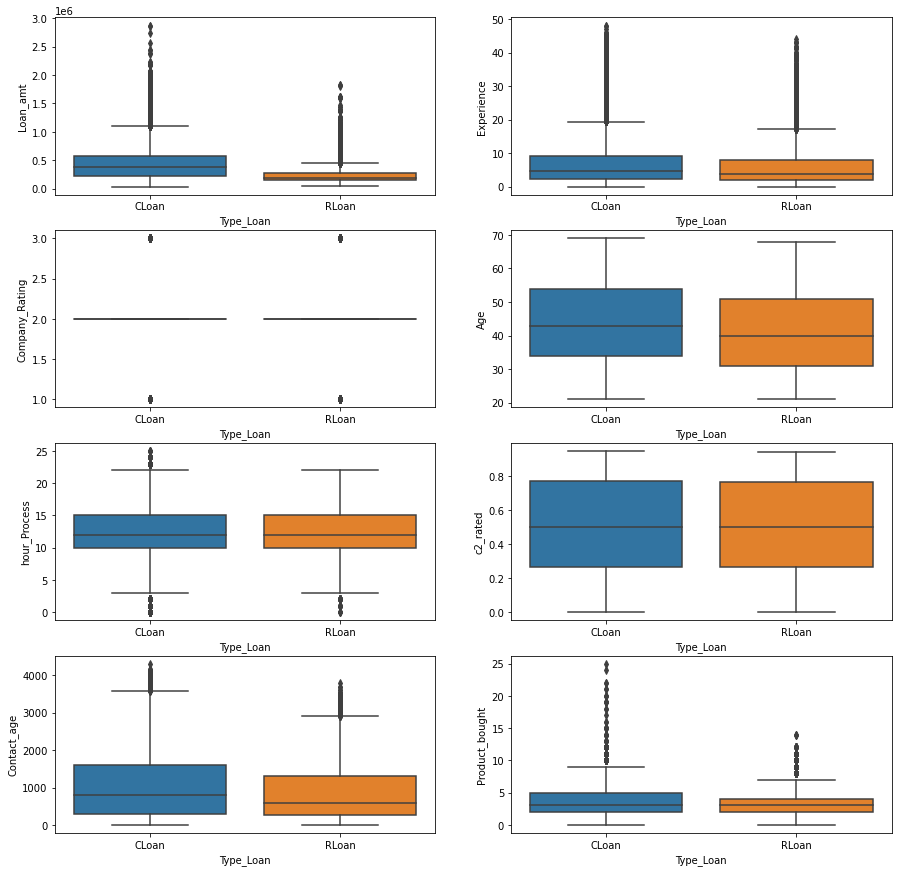

In [121]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(15,15))
for variable, subplot in zip(numdf.columns, ax.flatten()):
  if variable == "Default":
    continue
  else:
    sb.boxplot(x = df["Type_Loan"],y =df[variable], ax = subplot)
plt.show()

In [122]:
# post grauated peoples having more loan amount than others
#and the graduated peoples are more tends to buy products
# most of the peoples in the creditlnks 3 are in between 55-65 age peoples
# peoples having credictlnks 1-3 are bought more product than are type of creditlnks
# cloan type peoples are bought more product and their loan amount also comaprativly high

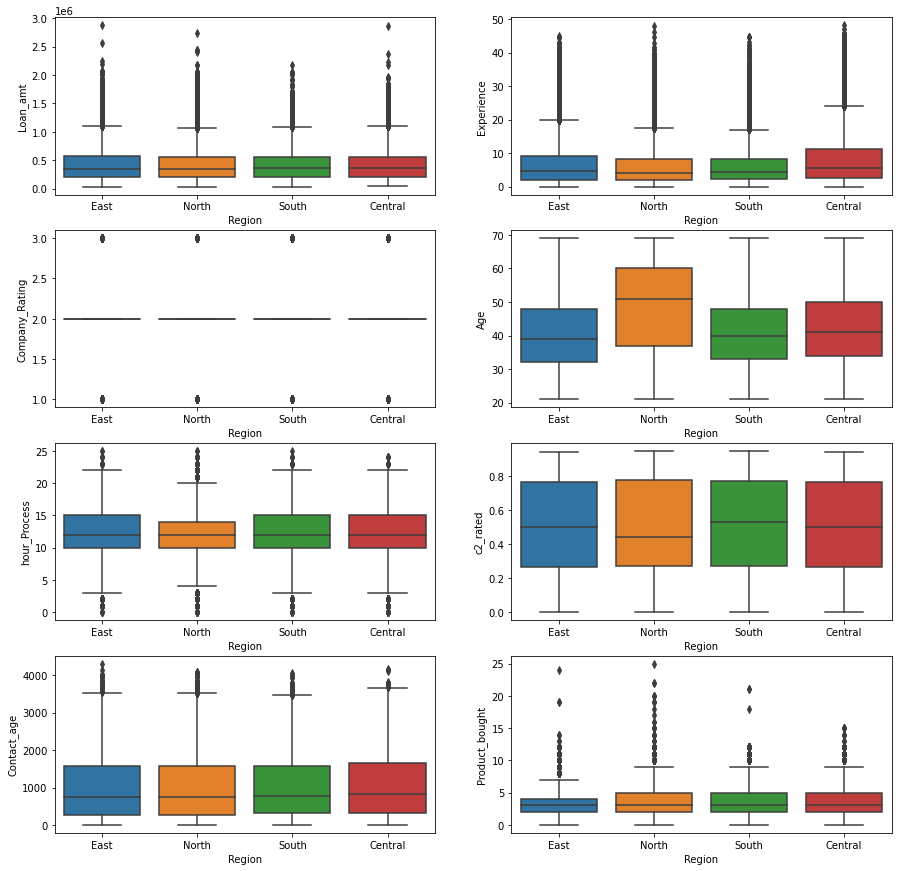

In [120]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(15,15))
for variable, subplot in zip(numdf.columns, ax.flatten()):
  if variable == "Default":
    continue
  else:
    sb.boxplot(x = df["Region"],y =df[variable], ax = subplot)
plt.show()

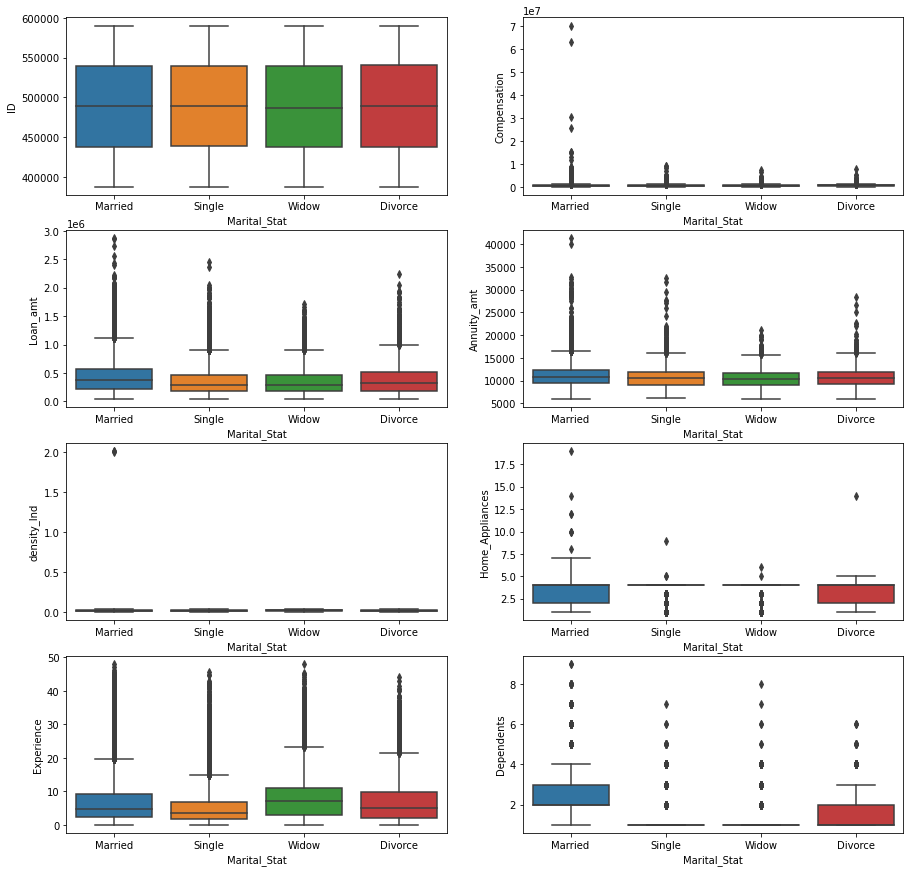

In [157]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(15,15))
for variable, subplot in zip(num_df.columns, ax.flatten()):
  if variable == "Default":
    continue
  else:
    sb.boxplot(x = df["Marital_Stat"],y = df[variable], ax = subplot)
plt.show()

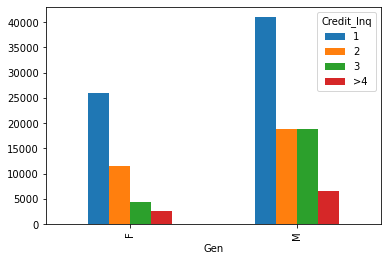

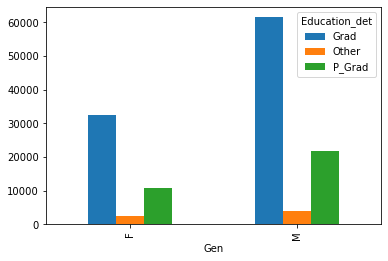

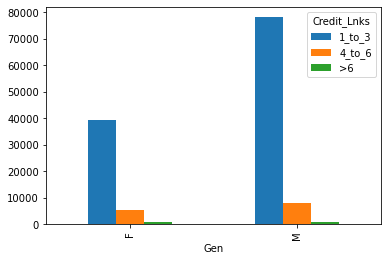

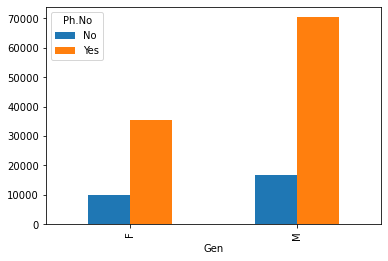

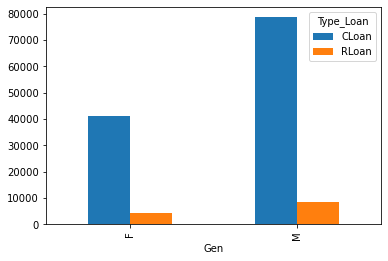

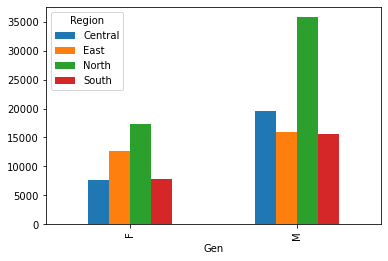

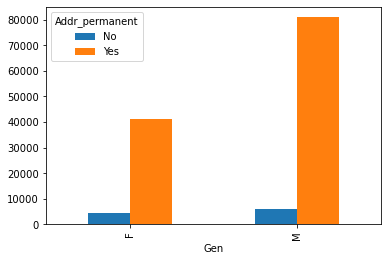

In [111]:
for i in catdf.columns:
  if i == 'Gen':
    continue
  else:
    pd.crosstab(df['Gen'],df[i]).plot(kind='bar')
    plt.show()


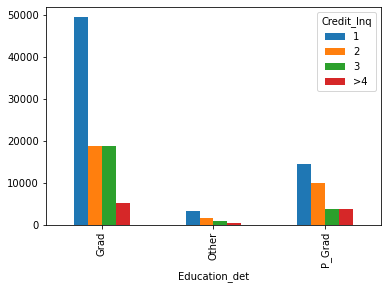

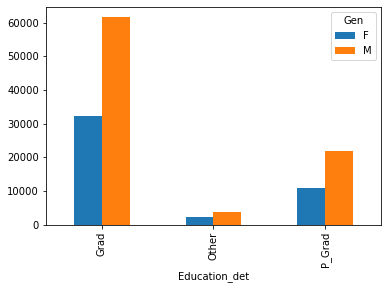

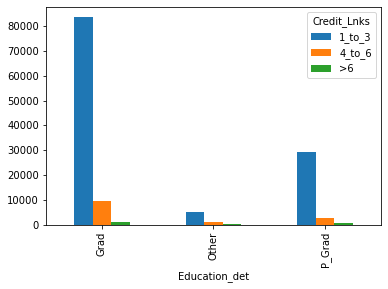

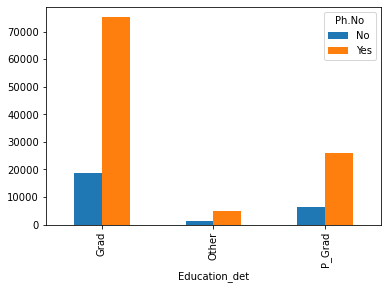

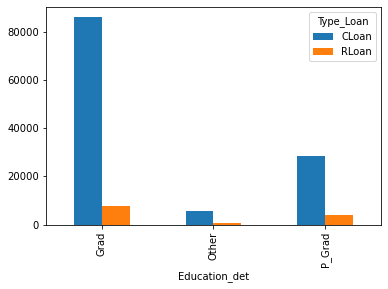

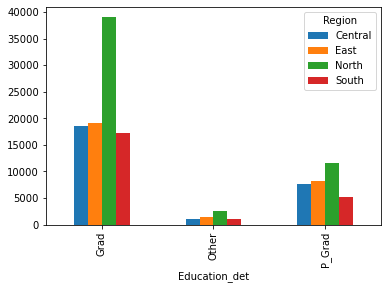

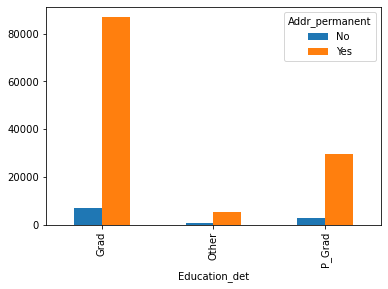

In [136]:
for i in catdf.columns:
  if i == 'Education_det':
    continue
  else:
    pd.crosstab(df['Education_det'],df[i]).plot(kind='bar')
    plt.show()


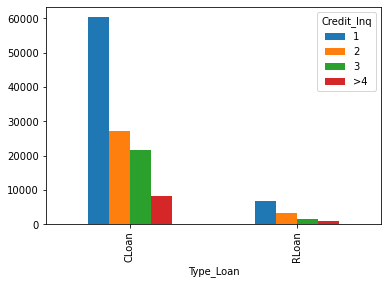

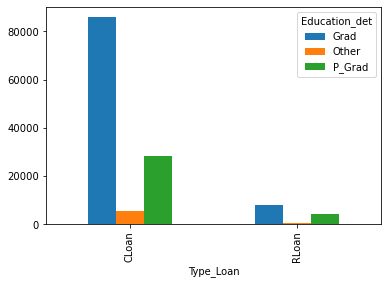

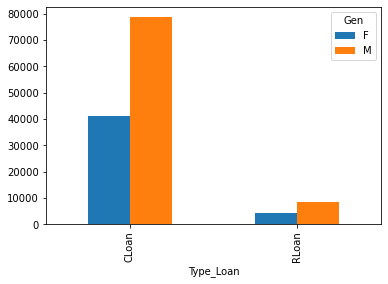

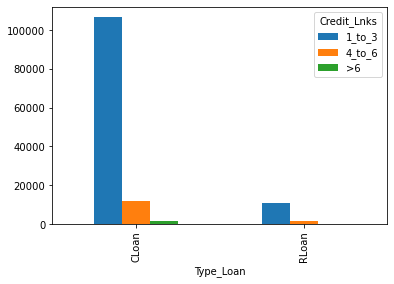

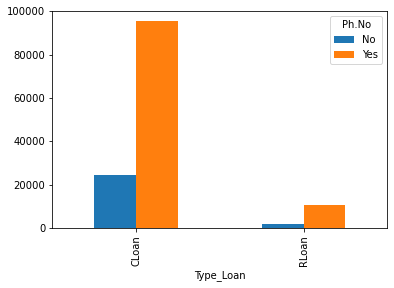

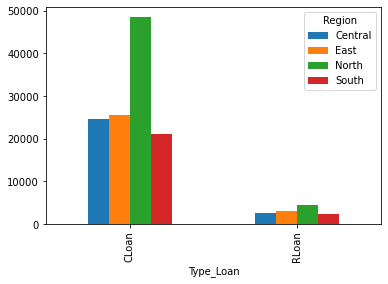

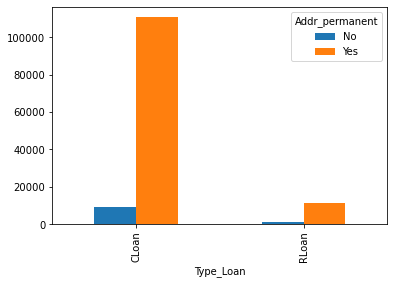

In [137]:
for i in catdf.columns:
  if i == 'Type_Loan':
    continue
  else:
    pd.crosstab(df['Type_Loan'],df[i]).plot(kind='bar')
    plt.show()


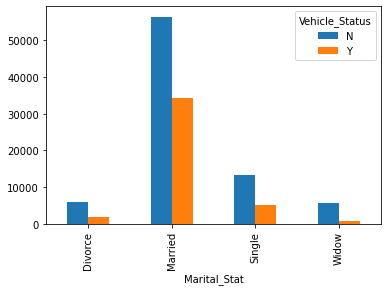

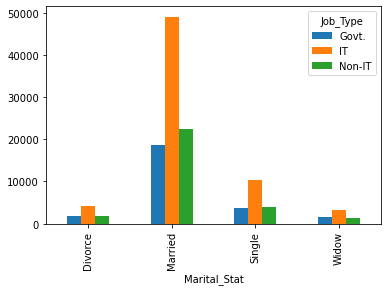

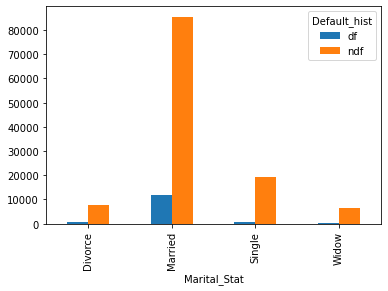

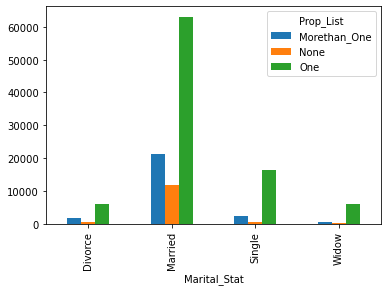

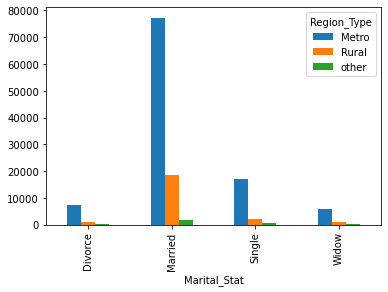

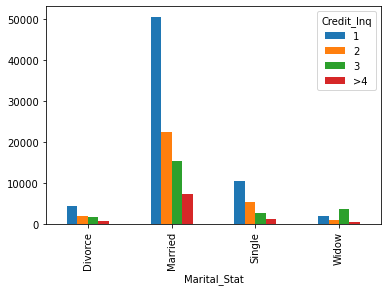

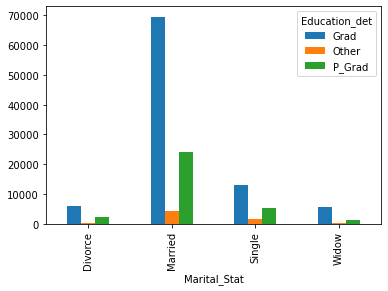

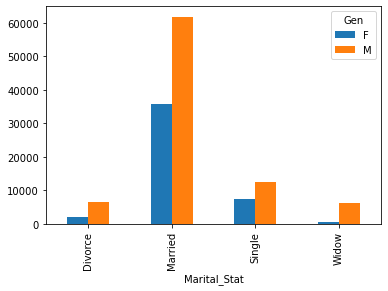

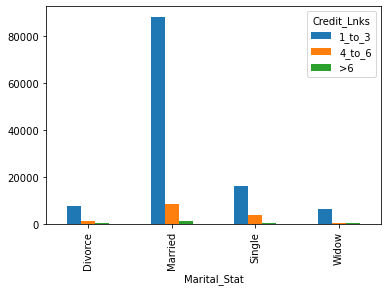

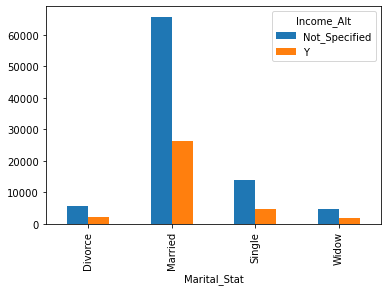

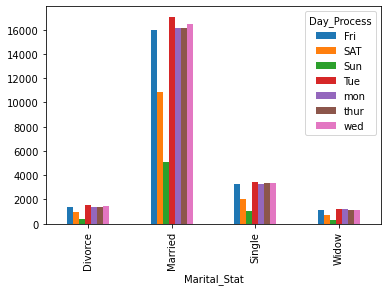

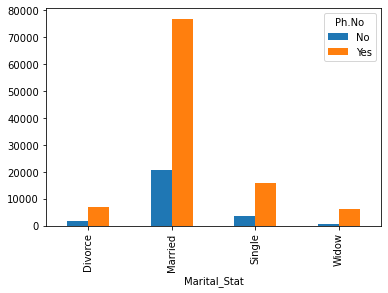

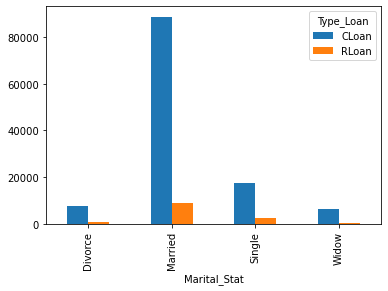

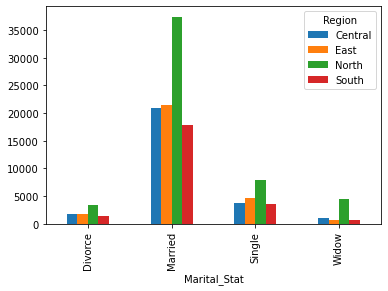

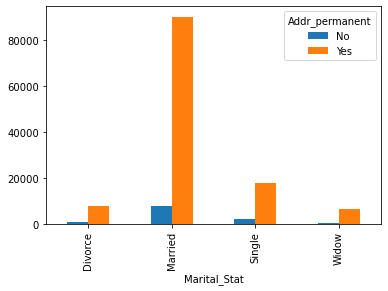

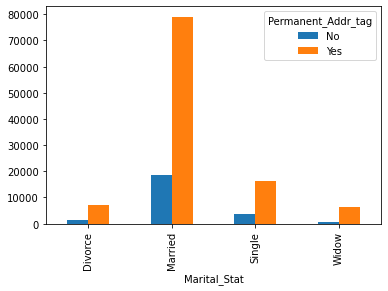

In [156]:
for i in cat_df.columns:
  if i == 'Marital_Stat':
    continue
  else:
    pd.crosstab(df['Marital_Stat'],df[i]).plot(kind='bar')
    plt.show()


In [141]:
num_df.columns

Index(['ID', 'Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating', 'Age',
       'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought',
       'Default'],
      dtype='object')

In [142]:
cat_df.columns

Index(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Region', 'Addr_permanent', 'Permanent_Addr_tag'],
      dtype='object')

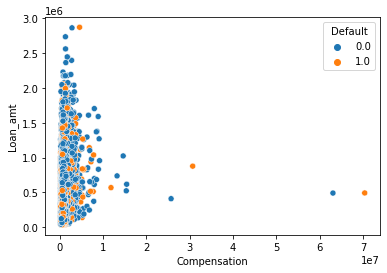

In [143]:
sb.scatterplot(df['Compensation'],df['Loan_amt'],hue=df['Default'])
plt.show()

In [151]:
# post grauated peoples having more loan amount than others
#and the graduated peoples are more tends to buy products
# most of the peoples in the creditlnks 3 are in between 55-65 age peoples
# peoples having credictlnks 1-3 are bought more product than are type of creditlnks
# cloan type peoples are bought more product and their loan amount also comaprativly high
# people had more loan are mostly not defaulters

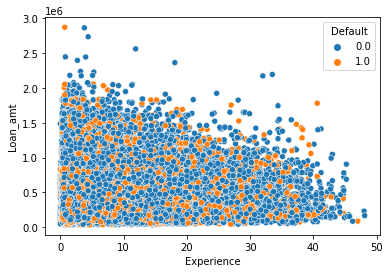

In [144]:
sb.scatterplot(df['Experience'],df['Loan_amt'],hue=df['Default'])
plt.show()

In [152]:
# post grauated peoples having more loan amount than others
#and the graduated peoples are more tends to buy products
# most of the peoples in the creditlnks 3 are in between 55-65 age peoples
# peoples having credictlnks 1-3 are bought more product than are type of creditlnks
# cloan type peoples are bought more product and their loan amount also comaprativly high
# people had more loan are mostly not defaulters
# people having low experiance having more loan amount
# people having more loan amt are mostly not defaulters

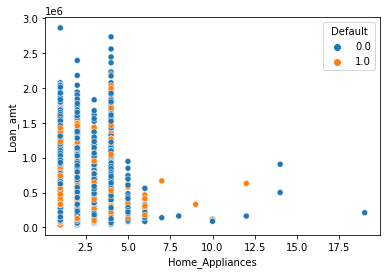

In [146]:
sb.scatterplot(df['Home_Appliances'],df['Loan_amt'],hue=df['Default'])
plt.show()

In [153]:
# post grauated peoples having more loan amount than others
#and the graduated peoples are more tends to buy products
# most of the peoples in the creditlnks 3 are in between 55-65 age peoples
# peoples having credictlnks 1-3 are bought more product than are type of creditlnks
# cloan type peoples are bought more product and their loan amount also comaprativly high
# people had more loan are mostly not defaulters
# people having low experiance having more loan amount
# people having more loan amt are mostly not defaulters
# people having home appliances >10 are mostly not defaulters

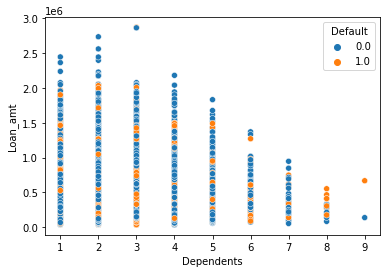

In [149]:
sb.scatterplot(df['Dependents'],df['Loan_amt'],hue=df['Default'])
plt.show()

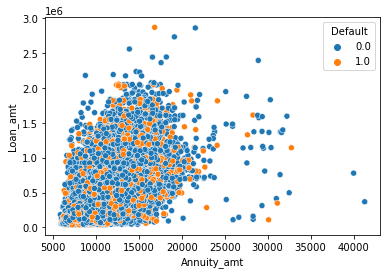

In [150]:
sb.scatterplot(df['Annuity_amt'],df['Loan_amt'],hue=df['Default'])
plt.show()

In [154]:
# people having more annuity are mostly not defaulters

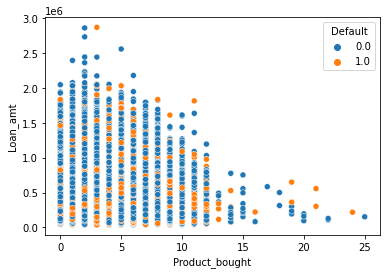

In [158]:
sb.scatterplot(df['Product_bought'],df['Loan_amt'],hue=df['Default'])
plt.show()

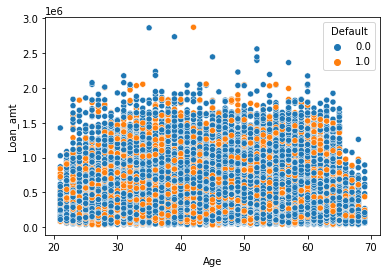

In [159]:
sb.scatterplot(df['Age'],df['Loan_amt'],hue=df['Default'])
plt.show()

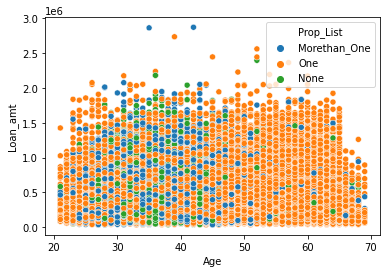

In [166]:
sb.scatterplot(df['Age'],df['Loan_amt'],hue=df['Prop_List'])
plt.show()

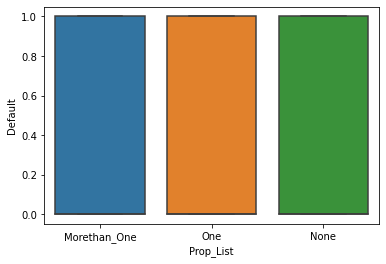

In [164]:
sb.boxplot(df['Prop_List'],df['Default'])
plt.show()

# MODEL BUILDING

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix,accuracy_score,f1_score

In [59]:
lr=LogisticRegression()
lr.fit(x,y)
ypred=lr.predict(xtest)

In [492]:
ypred.shape

(56760,)

In [494]:
ss=pd.read_csv('Sample_Submission_TVS.csv')
ss.shape

(56760, 2)

In [495]:
test=pd.DataFrame(ypred)
test.to_csv('testtvs.csv')

In [46]:
import imblearn
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_re, y_re = sm.fit_resample(x, y)

In [497]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_re,y_re)
ypred_dt=dt.predict(xtest)

In [498]:
test_dt=pd.DataFrame(ypred_dt)
test_dt.to_csv('test_dt.csv')

In [502]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(x_re,y_re)
ypred_ab=ab.predict(xtest)

In [504]:
test_ab=pd.DataFrame(ypred_ab)
test_ab.to_csv('test_ab.csv')

In [505]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_re,y_re)
ypred_gb=gb.predict(xtest)

In [506]:
test_gb=pd.DataFrame(ypred_gb)
test_gb.to_csv('test_gb.csv')

In [510]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb=HistGradientBoostingClassifier()
hgb.fit(x_re,y_re)
ypred_hgb=hgb.predict(xtest)

In [512]:
test_hgb=pd.DataFrame(ypred_hgb)
test_hgb.to_csv('test_hgb.csv')

In [51]:
tuned_paramaters = [{'n_estimators': [50, 100],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15], 
                     }]

In [56]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [ ]:
gb_grid = RadomizedSearchCV(estimator =xgb, 
                         param_grid = tuned_paramaters, 
              
                         n_jobs=-1)

# fit the model on X_train and y_train using fit()
gb_grid.fit(x_re, y_re)

# get the best parameters
print('Best parameters for Gradient Boositng Classifier: ', gb_grid.best_params_, '\n')

In [54]:
xgb=XGBClassifier()
xgb.fit(x_re,y_re)
ypred_xgb=xgb.predict(xtest)

[21:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
test_gb=pd.DataFrame(ypred_gbhp)
test_gbhp.to_csv('test_gbhp.csv')

In [ ]:
from xgboost import
xgb=
xbg.fit(x_re,y_re)
ypred_xgb=xgb.predict(xtest)

In [55]:
test_xgb=pd.DataFrame(ypred_xgb)
test_xgb.to_csv('test_xgb.csv')

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
def objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100,500)

    rf = RandomForestClassifier(criterion =criterion,
            max_depth=max_depth, 
            n_estimators=n_estimators
        )

    score = cross_val_score(rf, x_re, y_re, n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

In [57]:
import optuna

In [ ]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [67]:
rf = RandomForestClassifier(criterion ='gini',
            max_depth=63, 
            n_estimators=114
        )


In [ ]:
'criterion': 'gini', 'max_depth': 14, 'n_estimators': 189

In [68]:
rf.fit(x_re,y_re)
ypred_rf=rf.predict(xtest)

In [69]:
test_rf1=pd.DataFrame(ypred_rf)
test_rf1.to_csv('test_rf1.csv')

In [ ]:
test_sv=pd.DataFrame(ypred_sv)
test_sv.to_csv('test_sv.csv')

## Descriptive Section

### Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for. 
##### (This is an open-ended question and you are free to come up with a detailed explanation basis the analysis, model building exercise you have carried out)

In [ ]:
# post grauated peoples having more loan amount than others
#and the graduated peoples are more tends to buy products
# most of the peoples in the creditlnks 3 are in between 55-65 age peoples
# peoples having credictlnks 1-3 are bought more product than are type of creditlnks
# cloan type peoples are bought more product and their loan amount also comaprativly high
# people had more loan are mostly not defaulters
# people having low experiance having more loan amount
# people having more loan amt are mostly not defaulters
# people having home appliances >10 are mostly not defaulters
# people having more annuity are mostly not defaulters

# To Don't

1.don't give more loan amount to low experiance peoples, most of them are not defaulters
2.don't give more loan annuity to the loan amount
3.dependents of singles and widows are very low ,so those peoples kindly ensure their compensation is high or has any alternate income source
4.people from north region are mostly age between 50-60 ,and those peoples are mostly not defaulters 
5.people having home appliances > 10 are mostly not defaulters
6.before giving more loan amount and more loan annuity to a aged person
7.don't give more loan amount to the people who having home appliances less than 5

# To Do

1.people between 30-40 ages mostly defaulters and having properties more than one
2.grauated peoples are mostly defaulters 

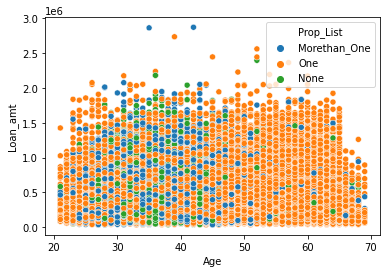

In [167]:
sb.scatterplot(df['Age'],df['Loan_amt'],hue=df['Prop_List'])
plt.show()

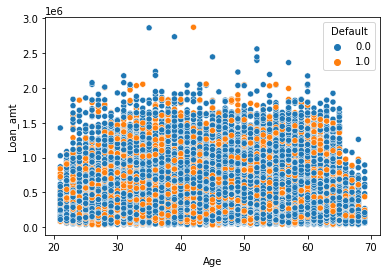

In [168]:
sb.scatterplot(df['Age'],df['Loan_amt'],hue=df['Default'])
plt.show()

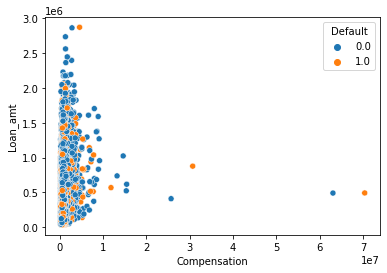

In [169]:
sb.scatterplot(df['Compensation'],df['Loan_amt'],hue=df['Default'])
plt.show()

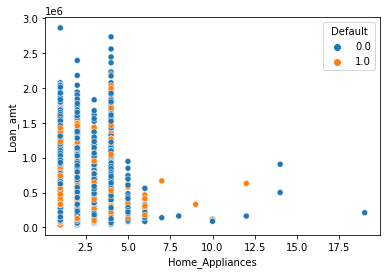

In [171]:
sb.scatterplot(df['Home_Appliances'],df['Loan_amt'],hue=df['Default'])
plt.show()

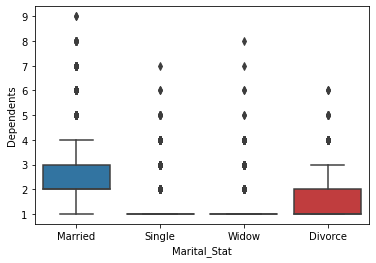

In [172]:
sb.boxplot(x = df["Marital_Stat"],y = df['Dependents'])
plt.show()

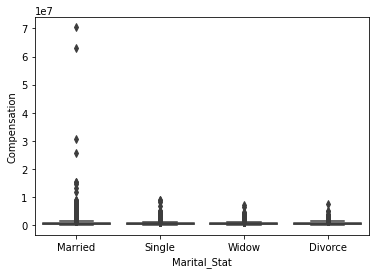

In [173]:
sb.boxplot(x = df["Marital_Stat"],y = df['Compensation'])
plt.show()

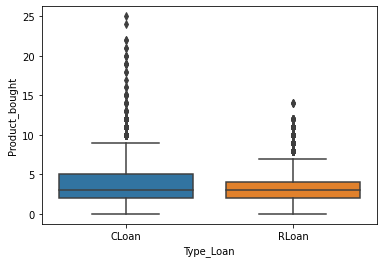

In [174]:
sb.boxplot(x = df["Type_Loan"],y =df['Product_bought'])
plt.show()

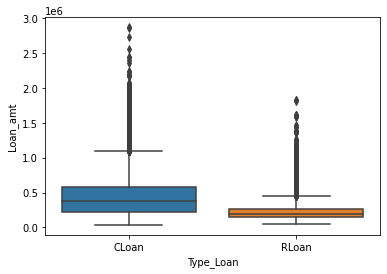

In [175]:
sb.boxplot(x = df["Type_Loan"],y =df['Loan_amt'])
plt.show()